# Proyecto Integrador

In [1]:
# Importar librerias y asignacion de alias

import pandas as pd 
# Proporciona estructura de datos 

import numpy as np
# Matrices eficientes

import matplotlib.pyplot as plt
# Creacion de visualizaciones esteticas

import seaborn as sns
# Creacion de graficos estadisticos

### Avance N°1 - Carga y transformación de los datos

Se carga el archivo y se comprueba el dataset con la cantidad de registros y columnas especificadas

In [5]:
# Lectura del archivo 'data_latinoamerica.csv' 
df = pd.read_csv('data_latinoamerica.csv', sep=',')

In [6]:
# Accedemos y vemos la dimension del DataFrame en una tupla
df.shape

(12216057, 50)

In [7]:
df.head(5)

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [8]:
print(df.columns.values)

['location_key' 'date' 'country_code' 'country_name' 'new_confirmed'
 'new_deceased' 'cumulative_confirmed' 'cumulative_deceased'
 'cumulative_vaccine_doses_administered' 'population' 'population_male'
 'population_female' 'population_rural' 'population_urban'
 'population_density' 'human_development_index' 'population_age_00_09'
 'population_age_10_19' 'population_age_20_29' 'population_age_30_39'
 'population_age_40_49' 'population_age_50_59' 'population_age_60_69'
 'population_age_70_79' 'population_age_80_and_older' 'gdp_usd'
 'gdp_per_capita_usd' 'latitude' 'longitude' 'area_sq_km'
 'smoking_prevalence' 'diabetes_prevalence' 'infant_mortality_rate'
 'nurses_per_1000' 'physicians_per_1000' 'average_temperature_celsius'
 'minimum_temperature_celsius' 'maximum_temperature_celsius' 'rainfall_mm'
 'relative_humidity' 'population_largest_city' 'area_rural_sq_km'
 'area_urban_sq_km' 'life_expectancy' 'adult_male_mortality_rate'
 'adult_female_mortality_rate' 'pollution_mortality_rate'
 '

Se selecciona los países donde se expandirán la informacion y donde se hará el analisis de datos - Colombia, Argentina, Chile, México, Perú y Brasil

In [4]:
# Definimos en una lista los paises especificos
paises_selecionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

# Ubicamos los paises seleccionados en el dataset y los filtramos en un nuevo DataFrame
df_latam = df[df['country_name'].isin(paises_selecionados)]

# Vereficamos la cantidad de instancias 
df_latam.shape

(11970289, 50)

Verificamos la cantidad de datos faltantes por columna y como condicion se obtendrá los valores mayores a 4 millones de datos faltantes

In [5]:
# Indicamos cuántos valores faltantes hay en cada columna del DataFrame - df_latam.isnull().sum()
# Condicion de fitrado - [df_latam.isnull().sum() > 4000000]

""" Esto le ayuda a identificar columnas potencialmente problemáticas en sus datos que podrían requerir una mayor limpieza o manejo debido a la gran cantidad de entradas faltantes. """

df_latam.isnull().sum()[df_latam.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Buscamos la cantidad de localizaciones unicas de un pais

In [6]:
# Seleccion de la columna 'location_key' , ya que tiene identificadores unicos
# value_counts() - cuenta la cantidad de ocurrencias de cada valor unico

""" Esta es una forma útil de comprender la distribución de las claves de ubicación en sus datos. """

df_latam.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

Al ver que hay datos faltantes en las columnas del Dataset, se filtrará por la columna 'location_key' donde se tomará las instancias de los paises seleccionados

In [7]:
# Comprobamos si el valor de la columna 'location_key' está presente en la lista

"""  Filtramos el DataFrame según claves de ubicación específicas y luego verifica las dimensiones (número de filas y columnas) del DataFrame filtrado resultante. """

df_latam_paises = df_latam[df_latam['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]
df_latam_paises.shape

(5946, 50)

Para facilidad y compresion filtramos los datos en fechas mayores a 2021-01-01

In [8]:
# Verificamos si el valor en la columna 'fecha' es mayor que la cadena '2021-01-01'

""" Mantenemos solo las entradas con fechas posteriores a un momento específico. """

df_latam_paises_Fecha = df_latam_paises[df_latam_paises['date'] > '2021-01-01']
df_latam_paises_Fecha.shape

(3744, 50)

Verificamos la cantidad de elementos que aún se encuentran vacios

In [9]:
# Indicamos cuántos valores faltantes hay en cada columna del DataFrame - df_latam_paises_Fecha.isnull().sum()
valores_nulos_fecha = df_latam_paises_Fecha.isnull().sum()[df_latam_paises_Fecha.isnull().sum() > 0]
print(valores_nulos_fecha)

# obetenemos las dimensiones del DataFrame df_latam_paises_Fecha
print(np.shape(df_latam_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [10]:
# Vemos las cantidad y nombre de las columnas que nos han quedado despues de la limpieza y filtro de los datos
# index - proporciona acceso a sus etiquetas de índice

valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

Llenaremos los datos faltantes con el promedio a nivel de Pais

In [68]:
# Seleccionamos y llenamos los datos faltantes con el promedio:
# df_latam_paises_Fecha.groupby('country_name')['new_confirmed'] - Agrupamos cada grupo por el nombre del pais y seleccionamos la columna 
# .transform(lambda x: x.fillna(round(x.mean()))) - Aseguramos que cada grupo complete los valores faltantes con el promedio

""" Esta estrategia supone que dentro de un país, los valores faltantes podrían estar relacionados con la tendencia general de casos confirmados. """

df_latam_paises_Fecha['new_confirmed'] = df_latam_paises_Fecha.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['new_deceased'] = df_latam_paises_Fecha.groupby('country_name')['new_deceased'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['cumulative_confirmed'] = df_latam_paises_Fecha.groupby('country_name')['cumulative_confirmed'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['cumulative_vaccine_doses_administered'] = df_latam_paises_Fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['average_temperature_celsius'] = df_latam_paises_Fecha.groupby('country_name')['average_temperature_celsius'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['minimum_temperature_celsius'] = df_latam_paises_Fecha.groupby('country_name')['minimum_temperature_celsius'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['maximum_temperature_celsius'] = df_latam_paises_Fecha.groupby('country_name')['maximum_temperature_celsius'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['rainfall_mm'] = df_latam_paises_Fecha.groupby('country_name')['rainfall_mm'].transform(lambda x: x.fillna(round(x.mean())))
df_latam_paises_Fecha['relative_humidity'] = df_latam_paises_Fecha.groupby('country_name')['relative_humidity'].transform(lambda x: x.fillna(round(x.mean())))

# LLenar los Nan con el valor de 0 en la columna new_recovered, cumulative_recovered para hacer analisis de datos 
df_latam_paises_Fecha['new_recovered'] = df_latam_paises_Fecha['new_recovered'].fillna(0)
df_latam_paises_Fecha['cumulative_recovered'] = df_latam_paises_Fecha['cumulative_recovered'].fillna(0)


Nuevamente verificamos la cantidad de instancias vacias del Dataset

In [69]:
print(df_latam_paises_Fecha.isnull().sum()[df_latam_paises_Fecha.isnull().sum() > 0])
print(df_latam_paises_Fecha.shape)

Series([], dtype: int64)
(3744, 50)


Guardamos los datos filtrados en un nuevo archivo

In [70]:
df_latam_paises_Fecha.to_csv('DatosFinalesFiltrado.csv', index=False)

Reiniciamos el notebook y cargamos el archivo filtrado

In [20]:
df_latam_paises = pd.read_csv('DatosFinalesFiltrado.csv', sep=',')

Verificamos el cálculo de estadísticas descriptivas y otras métricas importantes

1- ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?  
* El método 'describe()' calcula estadísticas descriptivas para las columnas de datos numéricos.  
* Estas métricas pueden ayudar en el análisis de datos al proporcionar un resumen rápido de la distribución y variabilidad de los datos.

2- ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?  
* Por defecto, este método se aplica solo a columnas de tipo numérico. Si una columna no contiene datos numéricos, no se incluirá en el resumen de 'describe()'.

3- ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?  
* La razón por la que solo se incluyen columnas numéricas es porque las estadísticas descriptivas (como la media, la desviación estándar, etc.) son más relevantes y aplicables a datos numéricos.

In [21]:
""" describe() - Cálculo de estadísticas resumidas, solo de columnas numericas """

# recuento: el número total de valores no faltantes en la columna
# media: el valor promedio de todos los valores no perdidos
# std: la desviación estándar de todos los valores no perdidos
# min: el valor mínimo que no falta
# 25%: el valor del percentil 25 (primer cuartil)
# 50%: el valor del percentil 50 (mediana)
# 75%: el valor del percentil 75 (tercer cuartil)
# max: el valor máximo no faltante

df_latam_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            7.464055e+07  7.772147e+07     3.787035e+07   
std                             8.939497e+07  6.713776e+07     3.318494e+07   
min                             1.800000e+01  1.757400e+07     8.972014e+06   
25%                             2.099960e+07  2.938188e+07     1.445076e+07   
50%                             4.087166e+07  4.791080e+07     2.225416e+07   
75%                             8.082964e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8949.370233          4.144853e+06  
std                      1.665972   22

Iteramos por cada columna que tenemos en el Dataset para verificar el cálculo descritivo

In [22]:
for i in df_latam_paises.columns:
    print(i)
    print(df_latam_paises[i].describe())
    print('-----------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%    

Creamos una función que permita obtener la mediana, varianza y el rango.

In [23]:
def describir_datos(data):
    # Iteramos sobre cada columna en el DataFrame
    for i in data.columns:
        # Verificamos si el tipo de datos es flotante o entero 
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            print(i)
            print('Mediana:', data[i].median())
            print('Varianza:', data[i].var())
            print('Rango:', data[i].max() - data[i].min())
            print('Moda:', data[i].mode())
            print('-----------------------------------')

describir_datos(df_latam_paises)

new_confirmed
Mediana: 5214.0
Varianza: 586577465.58212
Rango: 298981.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
-----------------------------------
cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420109841.22
Rango: 34567862.0
Moda: 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-----------------------------------
cumulative_deceas

### Avance N°2 - Análisis Exploratorio – Visualización

Acercamiento a las estadísticas básicas de los datos

In [24]:
for i in df_latam_paises.columns:
    print(i)
    print(df_latam_paises[i].describe())
    print('-----------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
-----------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%    

Colocamos como indice a la columna 'Date' para hacer un analisis de datos a lo largo del tiempo

In [25]:
# Convertimos los valores a 'datetime'
df_latam_paises['date'] = pd.to_datetime(df_latam_paises['date'])
""" Proporciona acceso a métodos y propiedades específicas para manejar datos temporales, 
    como el cálculo de diferencias entre fechas o la extracción de partes específicas de una fecha (por ejemplo, año, mes, día). """

# Colocamos la columna 'Date' como indice y realizar los cambios en el mismo Dataset
df_latam_paises.set_index('date', inplace = True)

In [30]:
df_latam_paises.shape

(3744, 49)

Realizamos una matriz de correlación, y verificamos alguna relación entre las variables

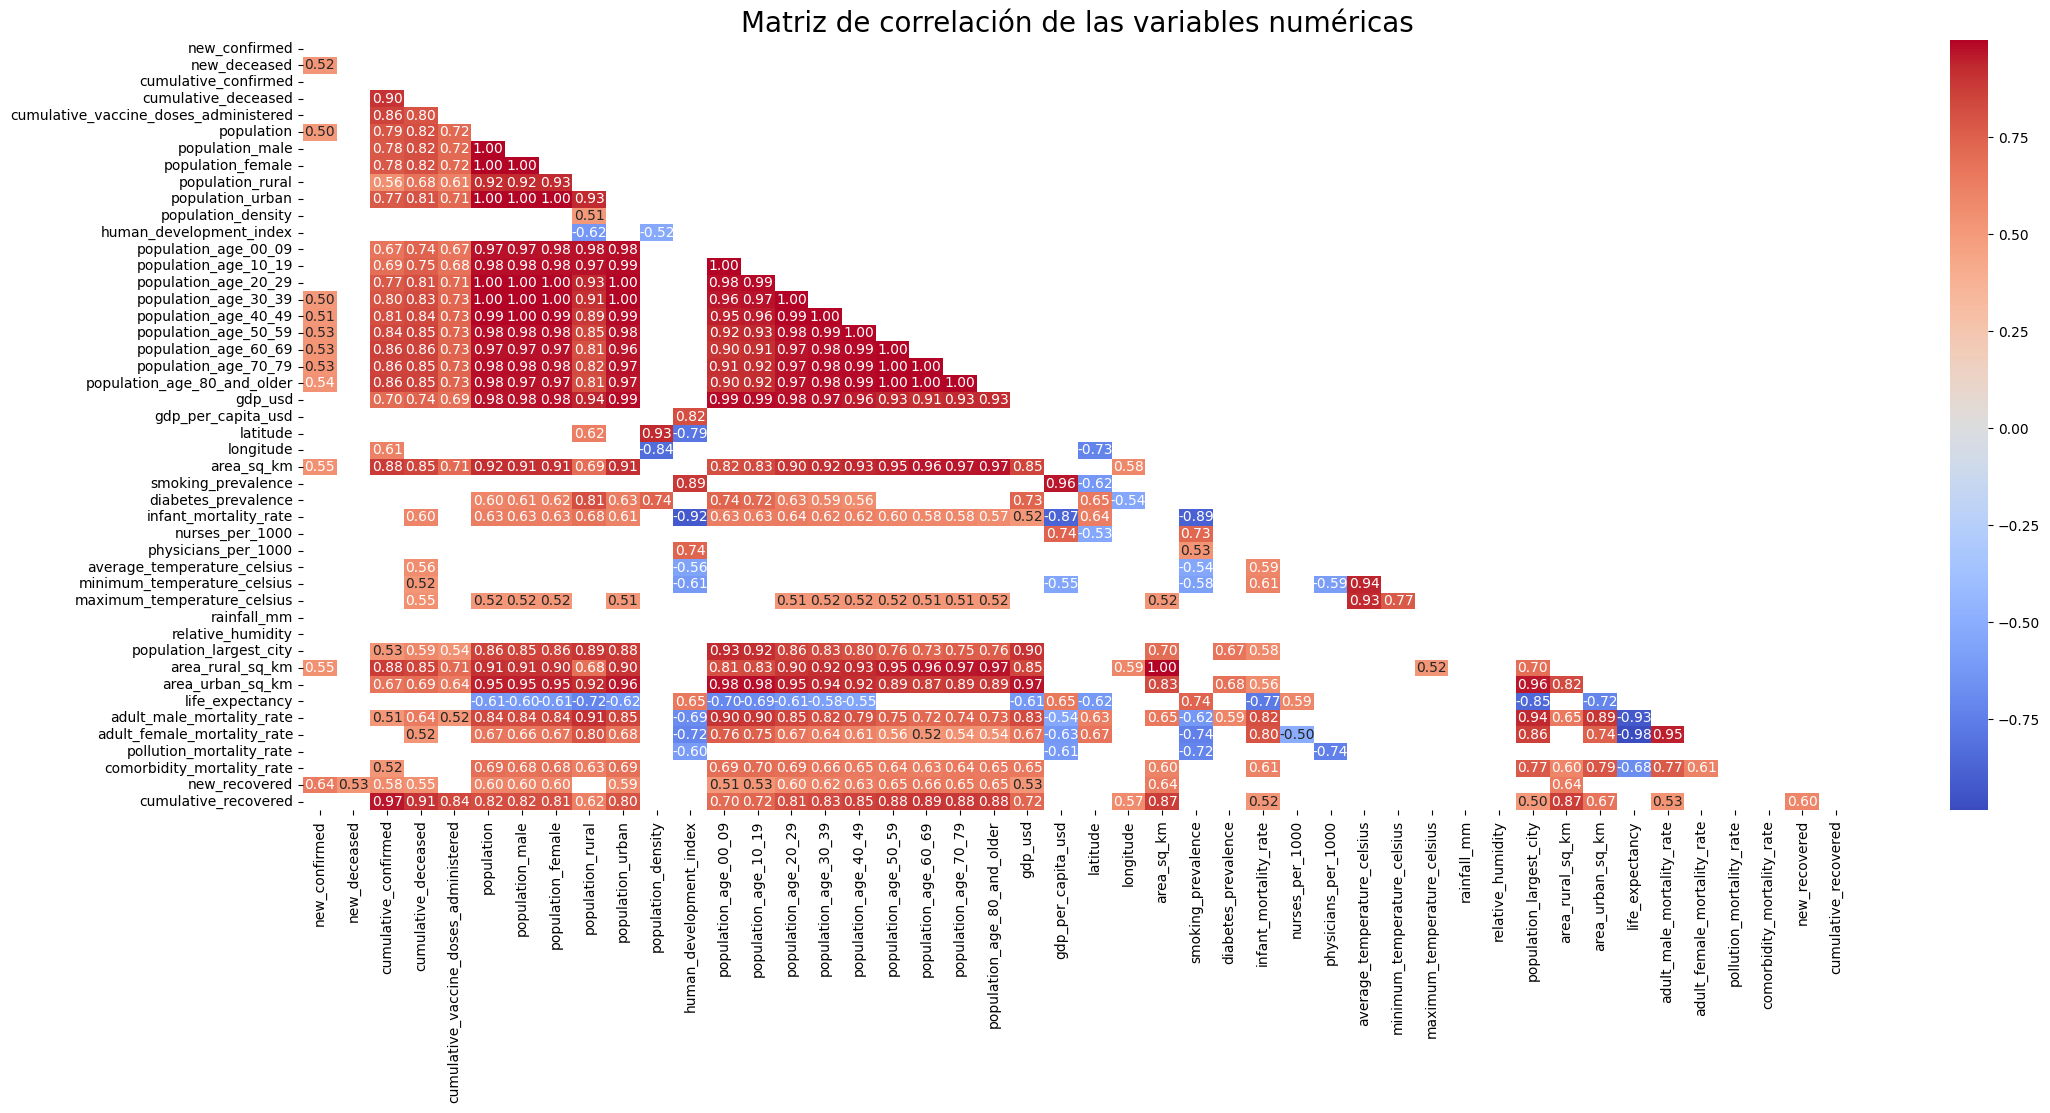

In [26]:
# Filtramos con '.select_dtypes' solo los datos que son enteros o flotantes de las columnas del DataFrame
numeric_columns = df_latam_paises.select_dtypes(include = ['float64', 'int64']).columns
# Calculamos la matriz de correlación para las columnas numéricas identificadas en el paso anterior
correlation_matrix = df_latam_paises[numeric_columns].corr()

# Crecion de una máscara triangular
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
# Solo mostrar los valores superiores a 0.5, donde se verificará una correlacion y tambien mostrará los valores negativos con abs()
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

""" Al comparar el valor absoluto del coeficiente de correlación con 0,5, 
    nos centramos en correlaciones más fuertes (ya sean positivas o negativas). 
    Esto ayuda a resaltar relaciones potencialmente significativas. """

plt.figure(figsize = (25, 10))
# Creacion del mapa de calor de 'correlation_matrix'
heatmap = sns.heatmap(correlation_matrix, 
                      mask = mask, 
                      annot = True, 
                      cmap = 'coolwarm', 
                      fmt = ".2f")

plt.title('Matriz de correlación de las variables numéricas', fontsize = 20)
plt.show()

* Las correlaciones entre las variables pueden utilizarse para comprender mejor la relación entre la COVID-19 y otros factores.  
* Por ejemplo, la correlación positiva entre la edad y el número de muertes por COVID-19 sugiere que las personas mayores son más propensas a morir a causa de la enfermedad.  
* La correlación negativa entre la prevalencia del tabaquismo y la tasa de vacunación sugiere que las personas que fuman son menos propensas a vacunarse contra la COVID-19.

Mostramos los graficos de frecuencia de cada pais, en donde excluimos a las siguientes columnas para tomar otras y realizar un analisis 

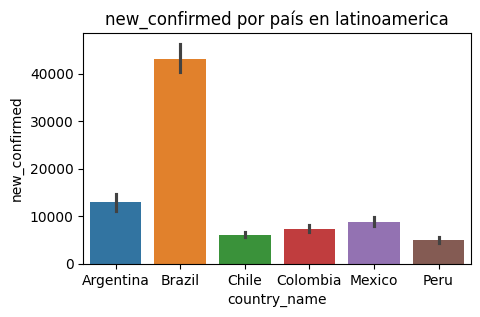

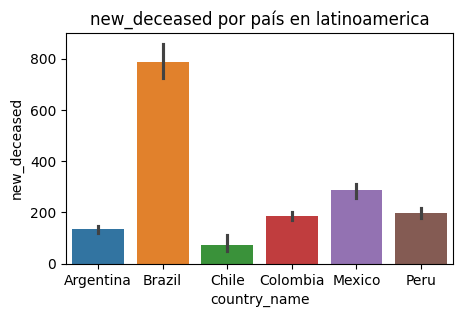

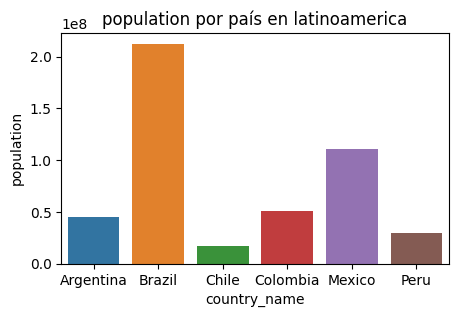

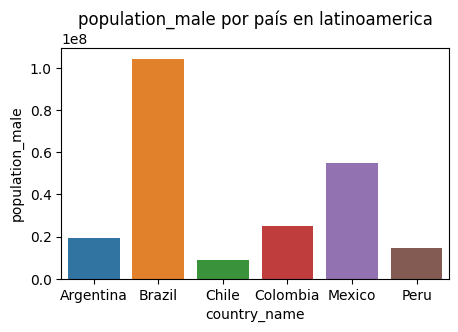

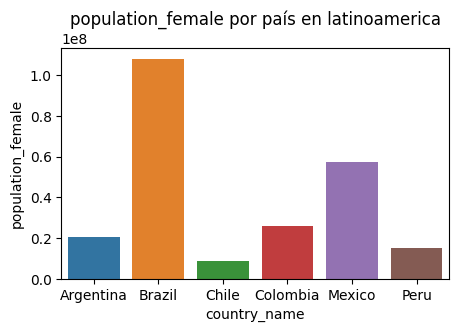

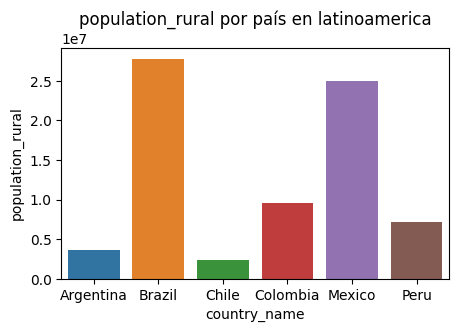

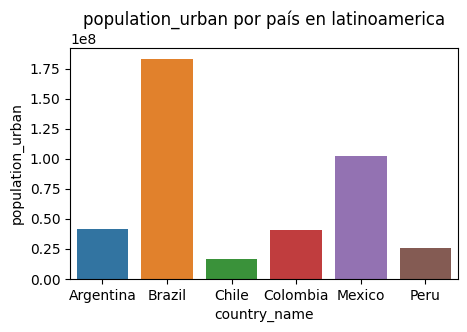

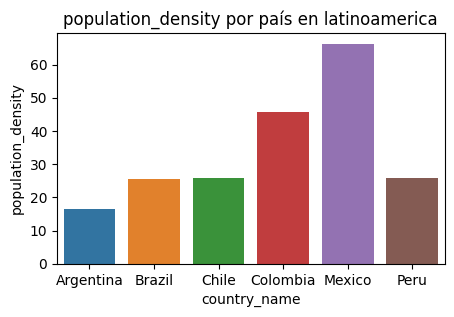

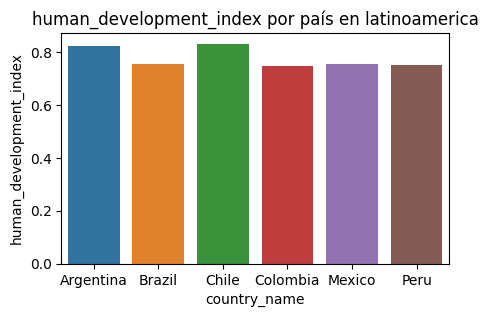

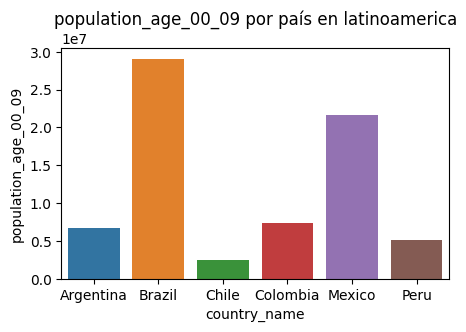

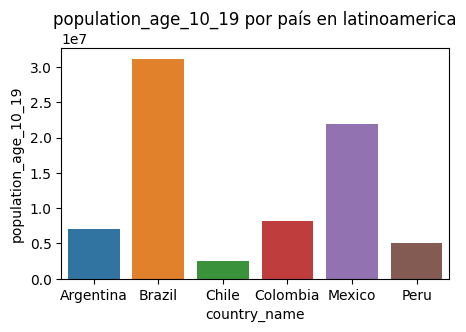

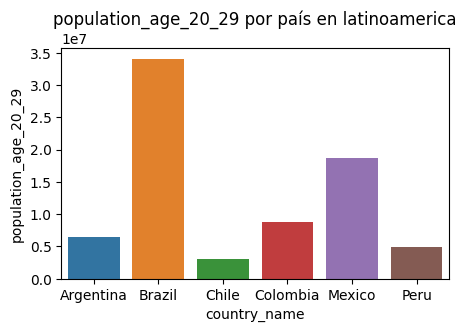

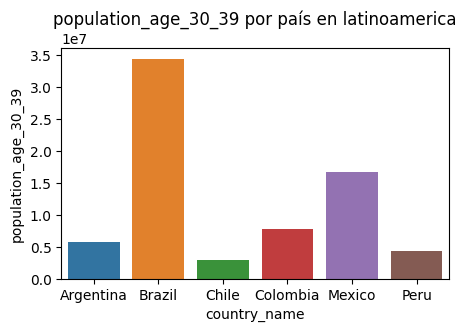

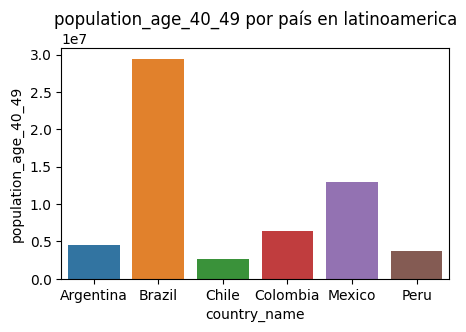

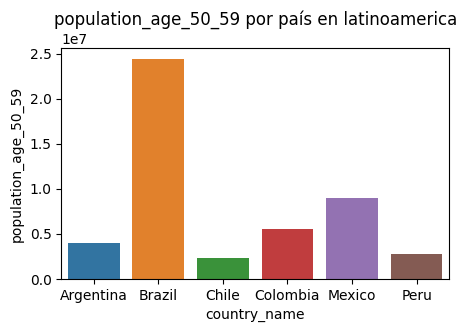

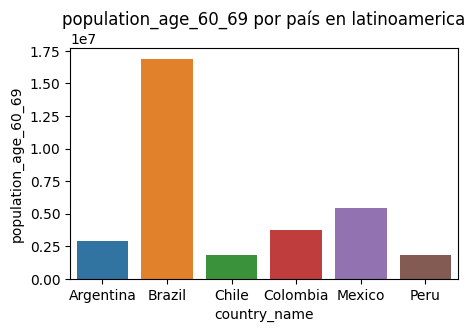

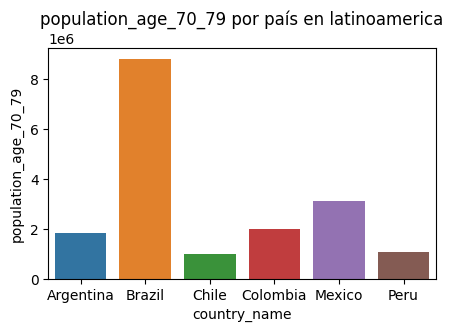

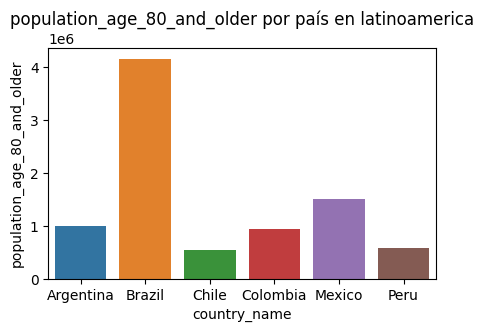

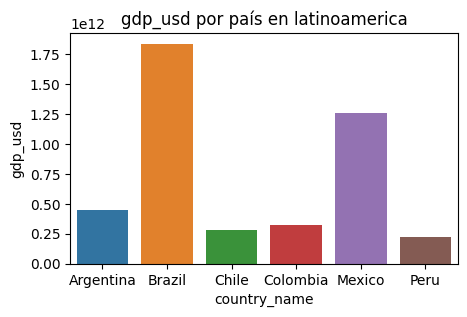

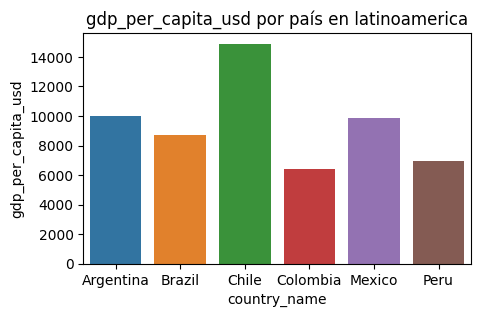

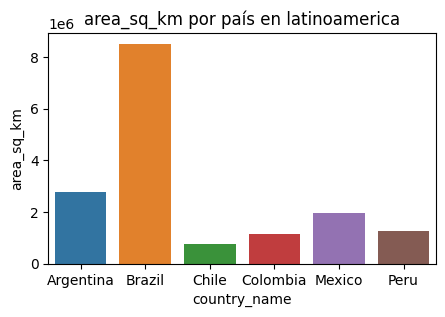

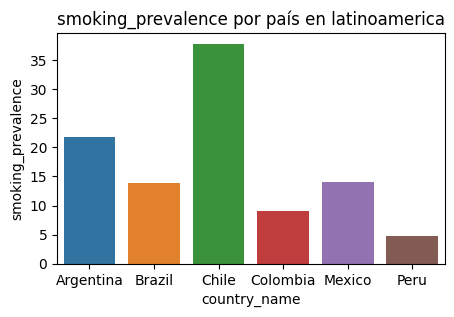

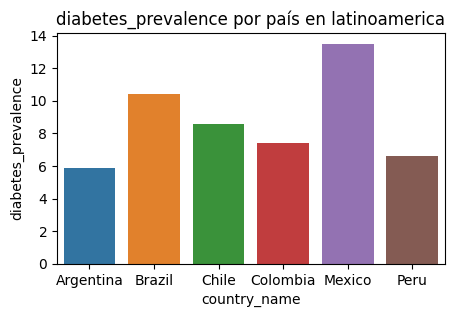

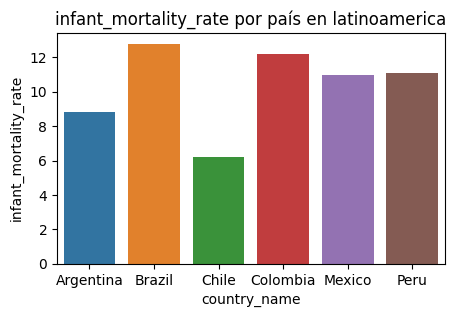

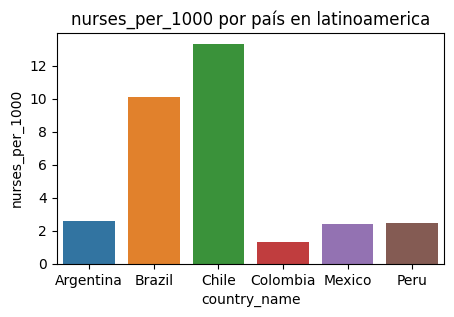

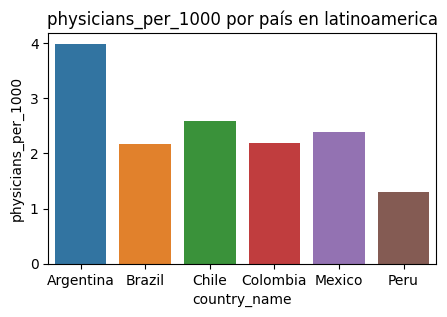

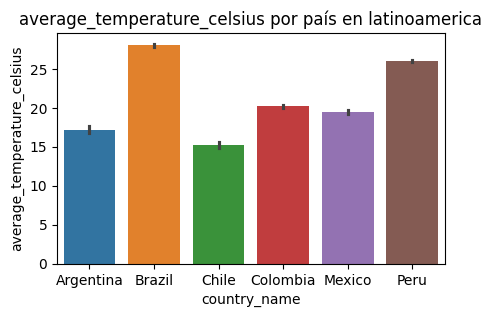

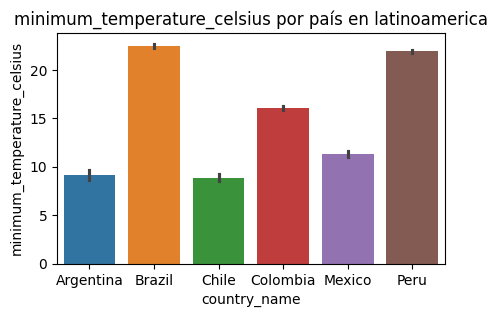

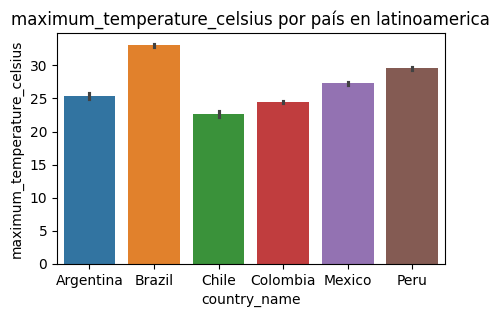

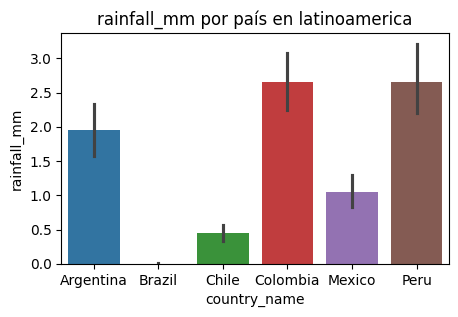

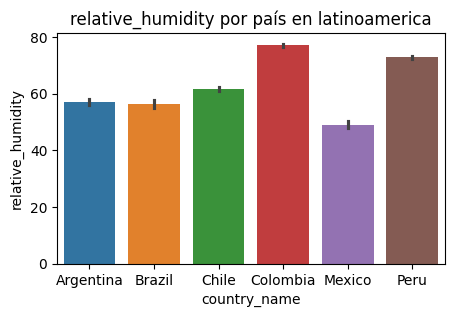

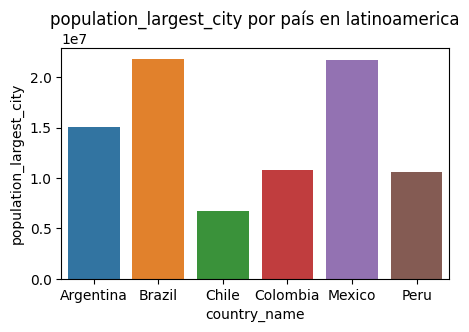

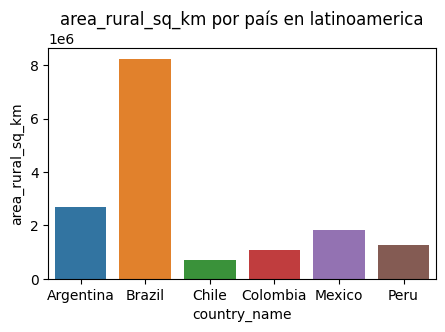

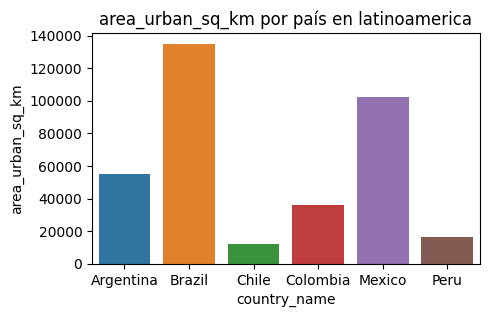

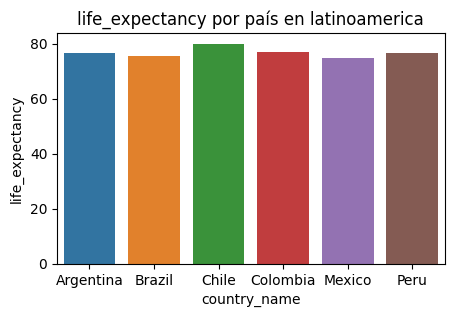

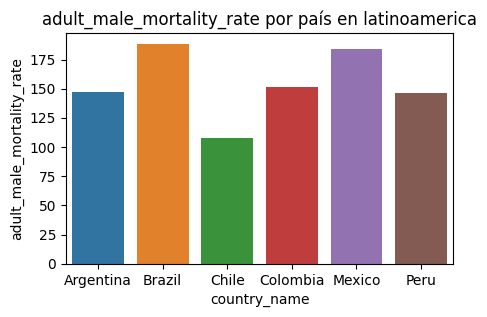

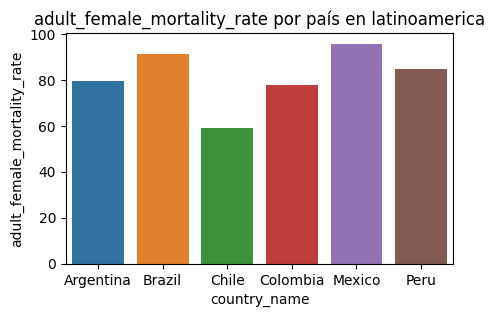

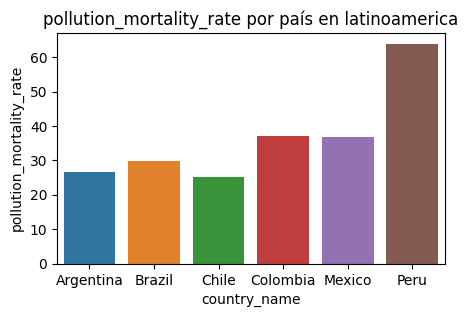

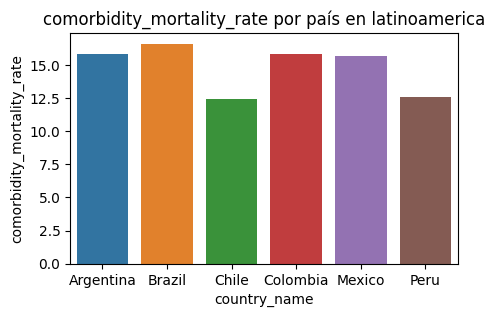

In [27]:
for i in df_latam_paises.columns:
    # Columnas que se estan excluyendo para el analisis
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
                 'cumulative_vaccine_doses_administered', 'new_recovered']:
        fig, ax = plt.subplots(figsize = (5, 3))
        
        # Creacion del grafico de barras de las columnas no excluyentes
        sns.barplot(x = 'country_name', 
                    y = i, 
                    data = df_latam_paises, 
                    ax = ax, 
                    hue ='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

Repetimos el proceso pero ahora vamos a realizar histogramas para ver la distribucion de los datos

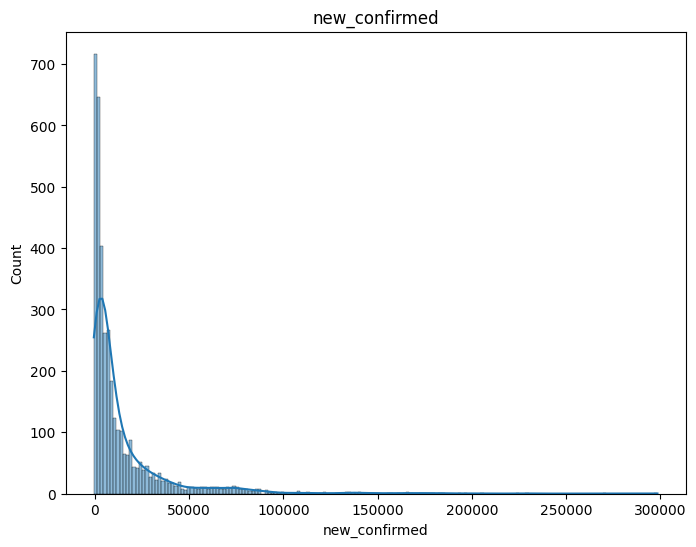

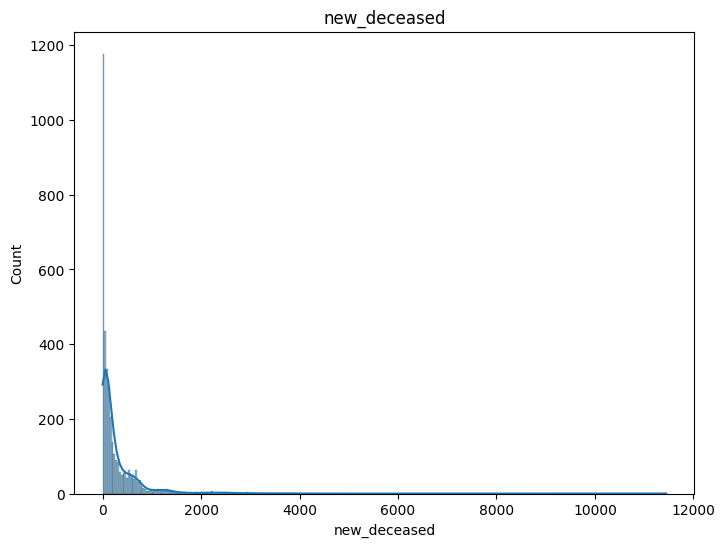

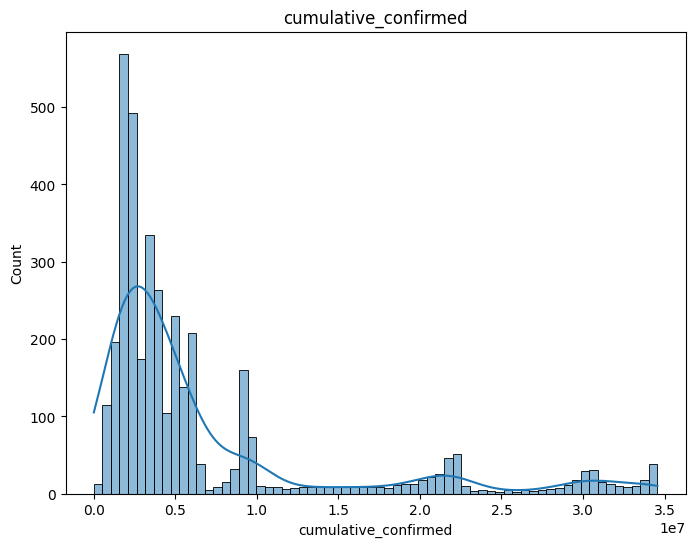

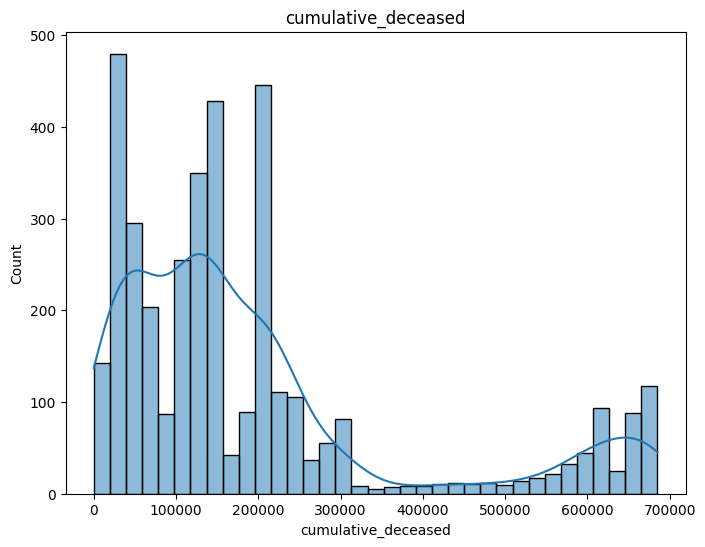

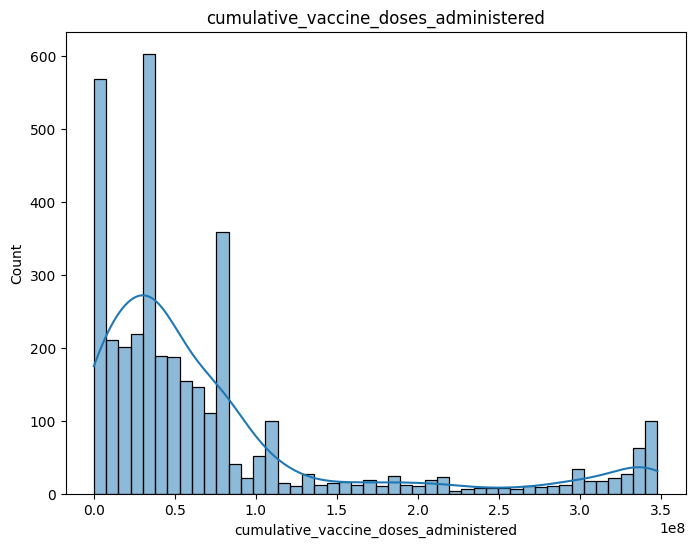

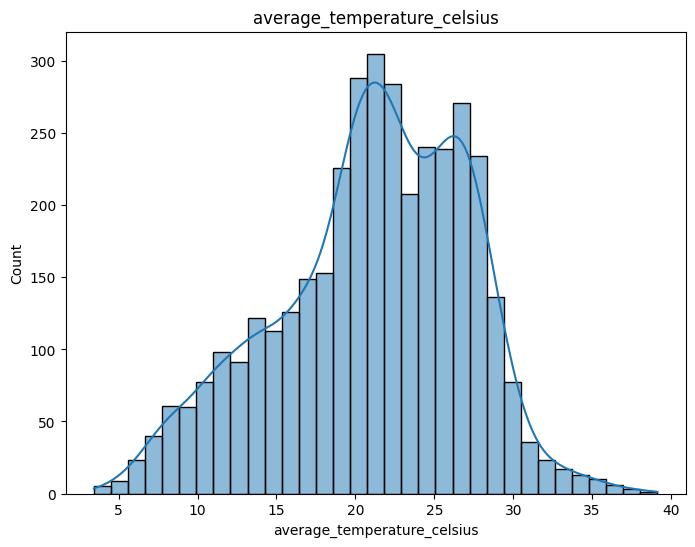

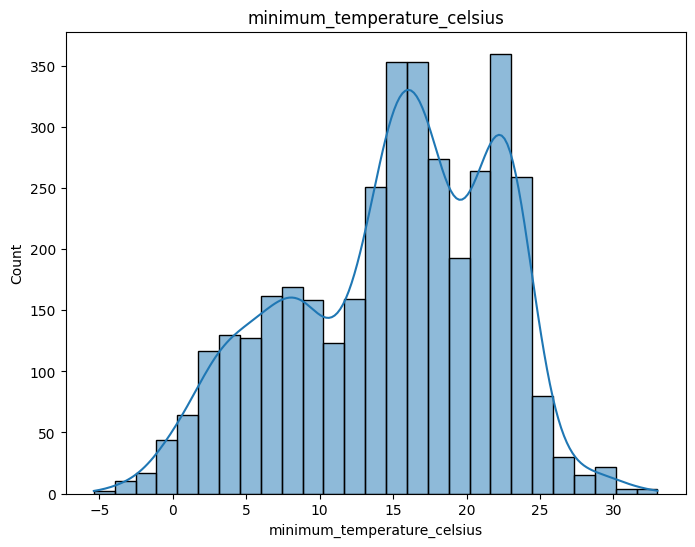

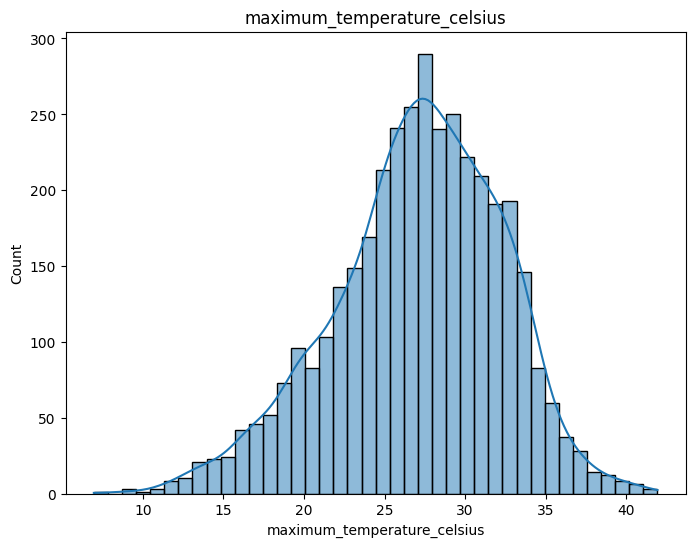

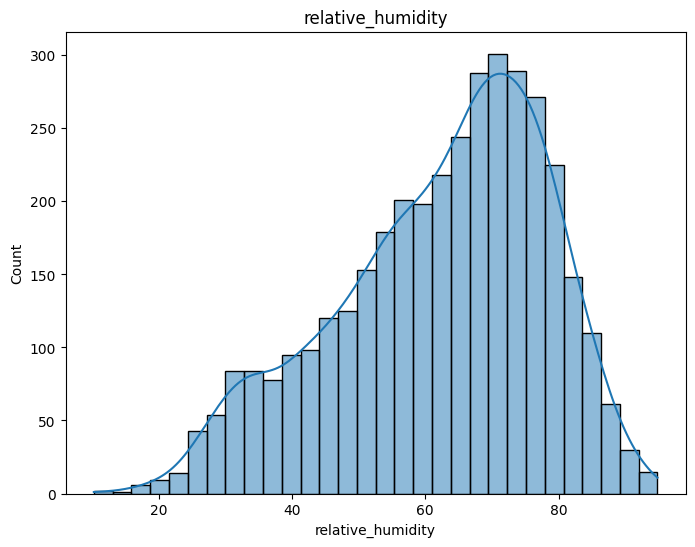

In [31]:
# Definimos en una lista las columnas que vamos a necesitar
list_columns = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 
                'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 
                'maximum_temperature_celsius', 'relative_humidity']

# Selecionamos las columnas que se encuentran en 'list_columns' 
for i in df_latam_paises[list_columns]:
    fig, ax = plt.subplots(figsize = (8, 6))
    
    # Creacion del histograma
    sns.histplot(df_latam_paises[i], 
                 # Curva de densidad de probabilidad
                 kde = True)

    plt.title(i)
    plt.show()

Se tratará de entender el comportamiento de los casos respecto a la temperatura, y se realizará un analisis enfocado en variables especificas

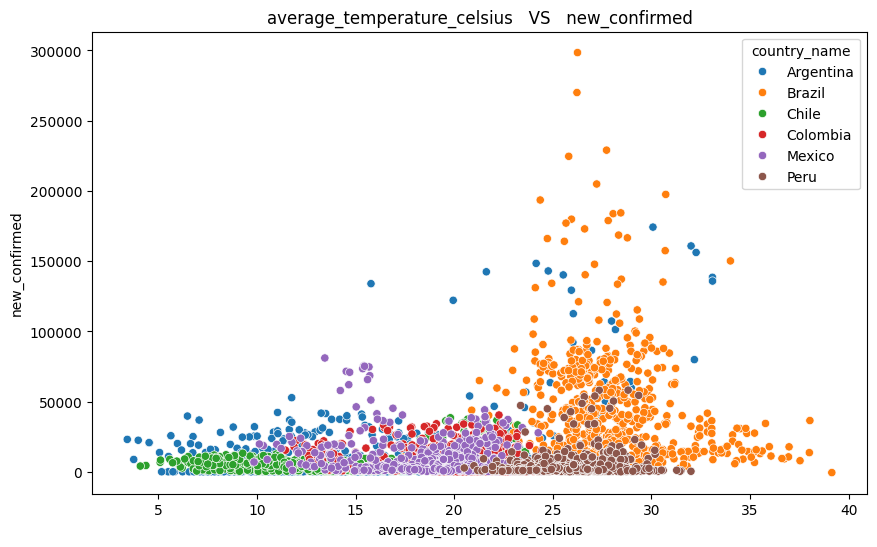

In [32]:
""" Analisis de distribucion con puntos """
# Creacion de la figura y eje 
fig, ax = plt.subplots(figsize = (10, 6))

# Creamos un diagrama de dispercion 
sns.scatterplot(x = 'average_temperature_celsius', 
                y = 'new_confirmed', 
                data = df_latam_paises, 
                hue = 'country_name')

plt.title('average_temperature_celsius   VS   new_confirmed')
plt.show()

Vemos que en algunos paises la temperatura no influye en la cantidad de casos confirmados, mientras que en otros si se puede observar
* Los países con el mayor número de nuevos casos confirmados son Argentina, Brasil, Colombia y México. Estos países también tienen una temperatura promedio relativamente alta.
* Los países con el menor número de nuevos casos confirmados son Chile y Perú. Estos países también tienen una temperatura promedio relativamente baja.

Ahora se realiza un analisis de la temperatura promedio con la cantidad de muertes

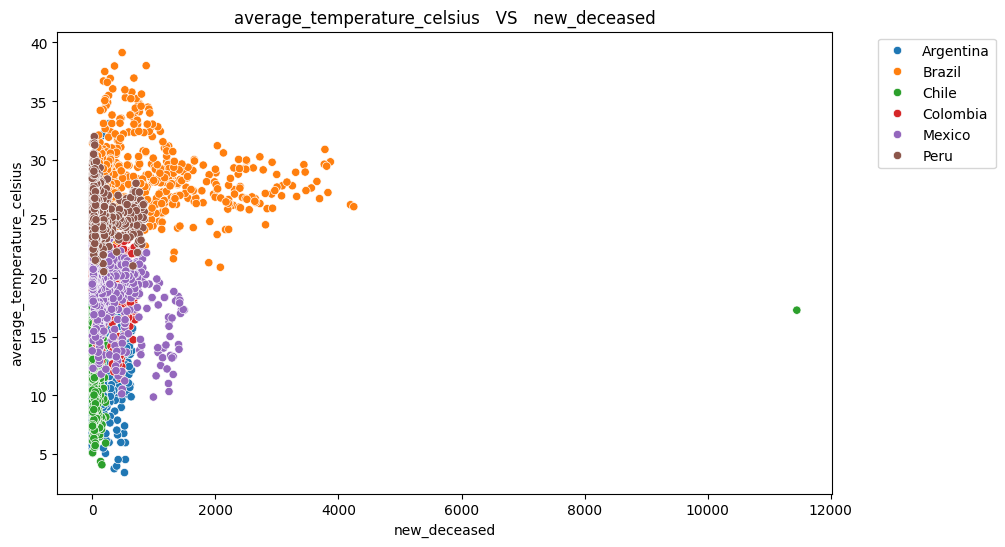

In [33]:
fig, ax = plt.subplots(figsize = (10, 6))

# Creamos un diagrama de dispercion 
sns.scatterplot(y = 'average_temperature_celsius', 
                x = 'new_deceased', 
                data = df_latam_paises, 
                hue = 'country_name')

plt.title('average_temperature_celsius   VS   new_deceased')
# Posicionamos la leyenda para que no interfieran con los datos
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

Se visualiza que el comportamiento es similar al de los casos "NUEVOS CONFIRMADOS", algunos paises la temperatura no influye en la cantidad de muertes.
* Los países con el mayor número de nuevos casos confirmados son Argentina, Brasil, Colombia y México. Estos países también tienen una temperatura promedio relativamente alta.
* Los países con el menor número de nuevos casos confirmados son Chile y Perú. Estos países también tienen una temperatura promedio relativamente baja.

Ahora veremos como se comportan las variables a lo largo del tiempo

Dosis administradas y acumuladas por mes en todos los paises de forma general

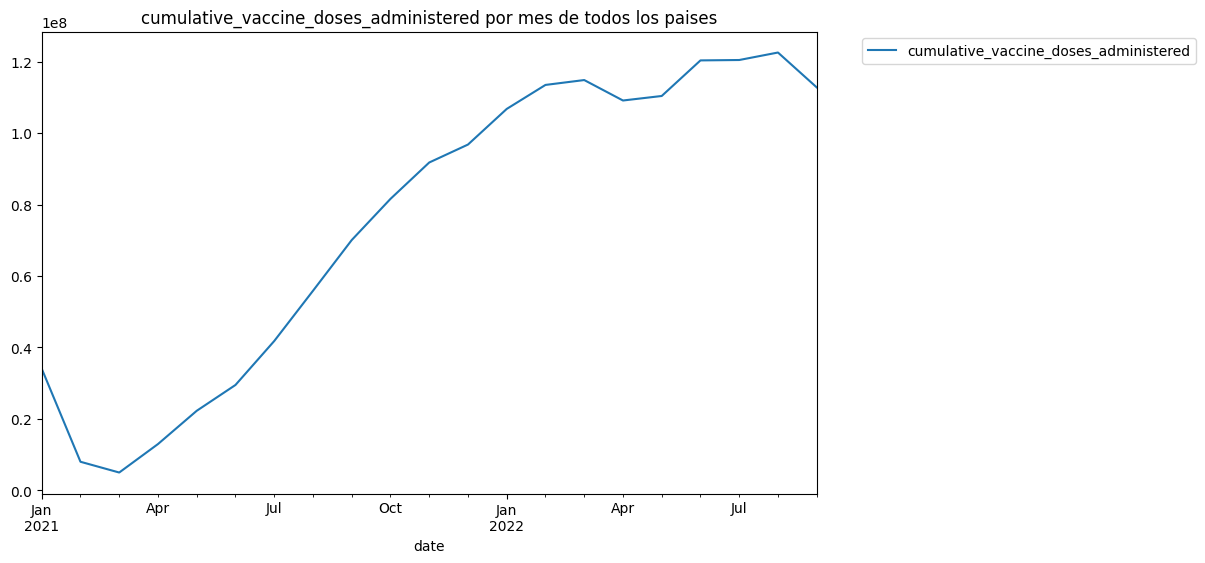

In [34]:
""" Utilizamos una grafica de linea solo para series temporales """

fig, ax = plt.subplots(figsize = (10, 6))

# Resumimos por mes y obtenemos el promedio con solo valores númericos agrupado de la columna 'cumulative_vaccine_doses_administered'
df_latam_paises.resample('ME').mean(numeric_only = True)['cumulative_vaccine_doses_administered'].plot()

# Posicionamos la leyenda para que no interfieran con los datos
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

Ahora visualizaremos las dosis administradas y acumuladas de manera especifica por pais

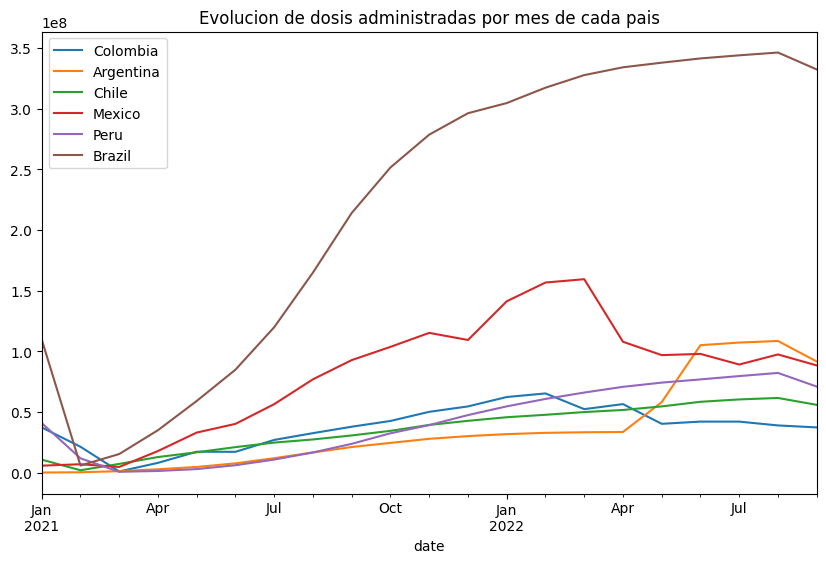

In [35]:
# Creacion de una lista con los paises seleccionados
paises_selecionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

fig, ax = plt.subplots(figsize = (10, 6))

for pais in paises_selecionados:
    # Calculamos el promedio de dosis acumuladas para el pais especifico
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['cumulative_vaccine_doses_administered'].plot()

plt.title('Evolucion de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()

Se observa según el analisis que a lo largo del tiempo en algunos paises la cantidad de dosis administradas ha ido aumentando, mientras en otros ha disminuido

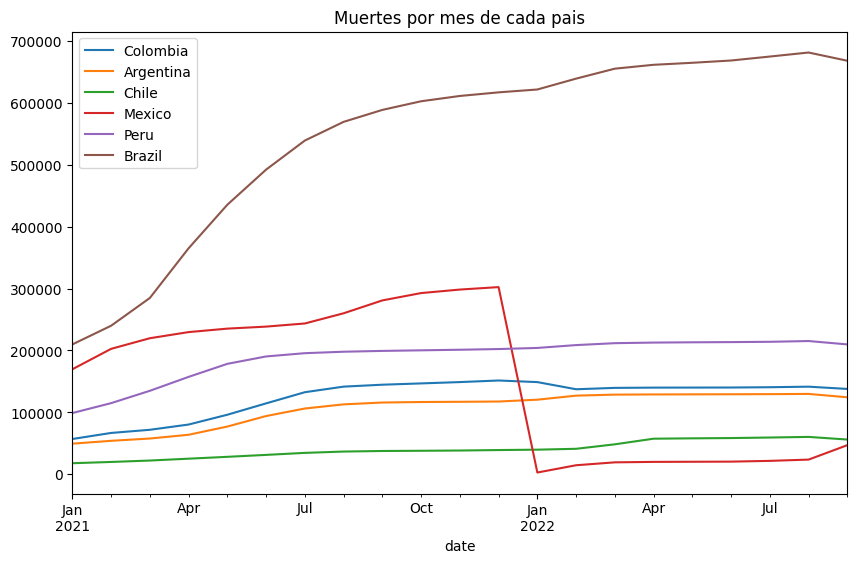

In [36]:
fig, ax = plt.subplots(figsize = (10, 6))

for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['cumulative_deceased'].plot()

plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()

Haciendo un analisis sobre las muerte acumulativas por pais vemos que Brasil ha tenido un incremento, seguido de Mexico y Peru. Debemos tener en cuenta la cantidad de poblacion en este analisis

* Importante: La disminucion enorme que presenta Mexico puede ser por perdida de datos o una disminucion real de casos

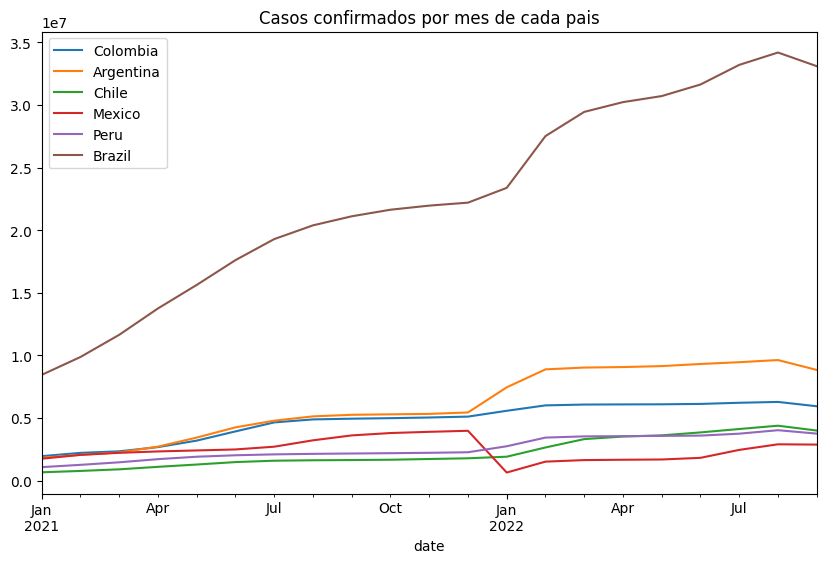

In [37]:
fig, ax = plt.subplots(figsize = (10, 6))

for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['cumulative_confirmed'].plot()

plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()

Visualizamos que Brasil muestra más casos comfirmados. Debemos tener en cuenta la cantidad de habitantes de cada pais

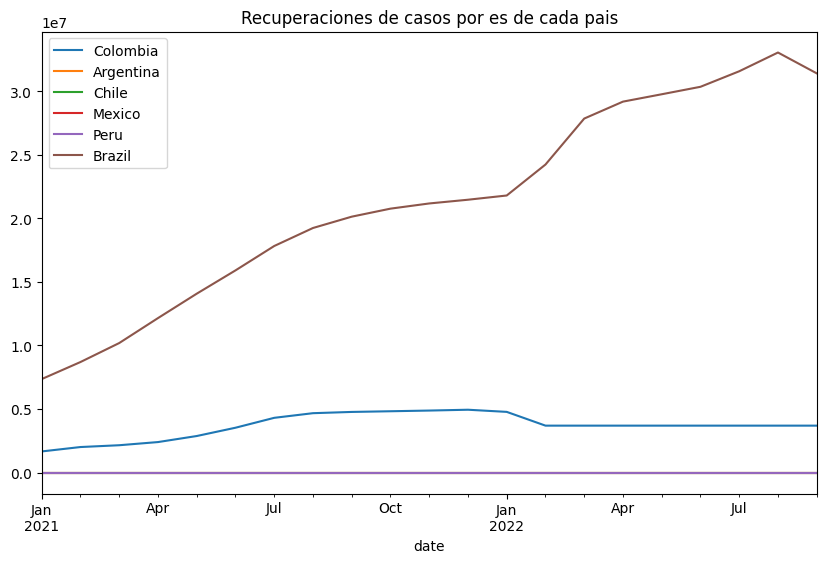

In [38]:
fig, ax = plt.subplots(figsize = (10, 6))

for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['cumulative_recovered'].plot()

plt.title('Recuperaciones de casos por es de cada pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()

Visualizamos que Brasil muestra más casos recuperados. Debemos tener en cuenta la cantidad de habitantes de cada pais

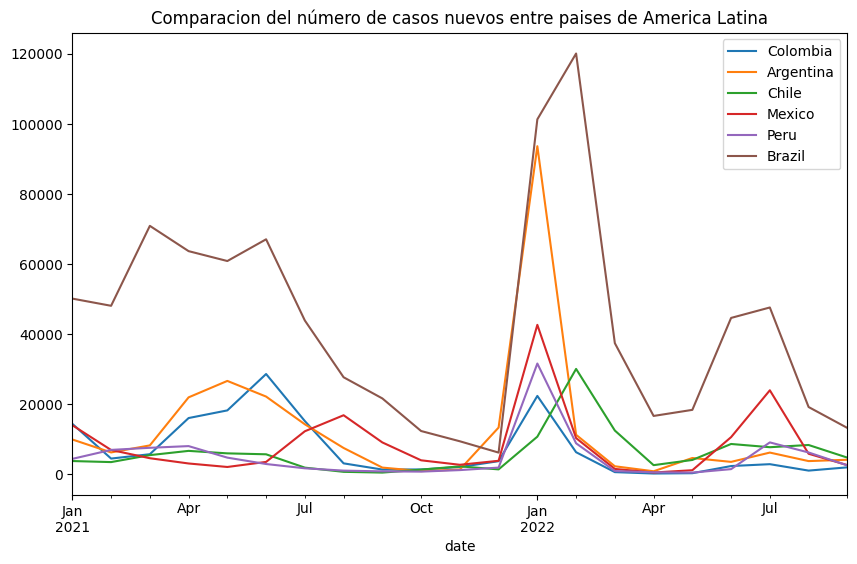

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))

for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['new_confirmed'].plot()

plt.title('Comparacion del número de casos nuevos entre paises de America Latina')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()

Visualizamos que el pais que mejor a manejado y administracion ha tenido es Chile, seguido de Perú y Argentina. Hubo un equilibiro entre la cantidad de muertes y casos confirmados es menor que otros paises

Text(0.5, 1.0, 'Distribucion de dosis acumulados por pais')

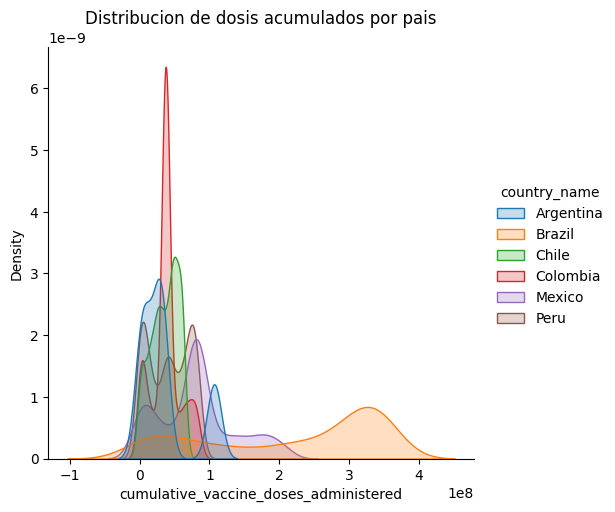

In [40]:
# Grafico que muestra la distribución de densidad en probabilidad
sns.displot(df_latam_paises, 
            x = 'cumulative_vaccine_doses_administered', 
            hue = 'country_name', 
            kind = 'kde', 
            fill = True)

plt.title('Distribucion de dosis acumulados por pais')

Se visualiza que Brasil ha manejado peor la pandemia, seguido de Mexico y Argentina. Se observa la cacntidad de muertes y casos confirmados es mayor que en otros paises

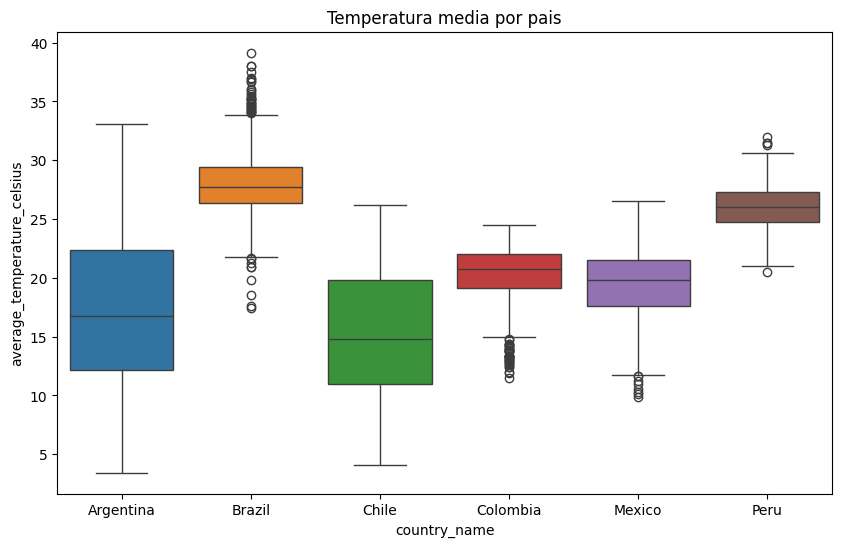

In [41]:
fig, ax = plt.subplots(figsize = (10, 6))

# Creacion del grafico de caja
sns.boxplot( x = 'country_name', 
            y = 'average_temperature_celsius',
            data = df_latam_paises,
            hue = 'country_name')
plt.title('Temperatura media por pais')
plt.show()

Se visualiza que Chile ha manejado mejor la pandemia ya que tiene rangos diferentes de temperatura y eso podria haber afectado la cantidad de casos confirmados y muertes

Por momento se puede verificar que los paises en donde se pueden crear nuevos centros serian donde hay mas casos comfirmados y muertes

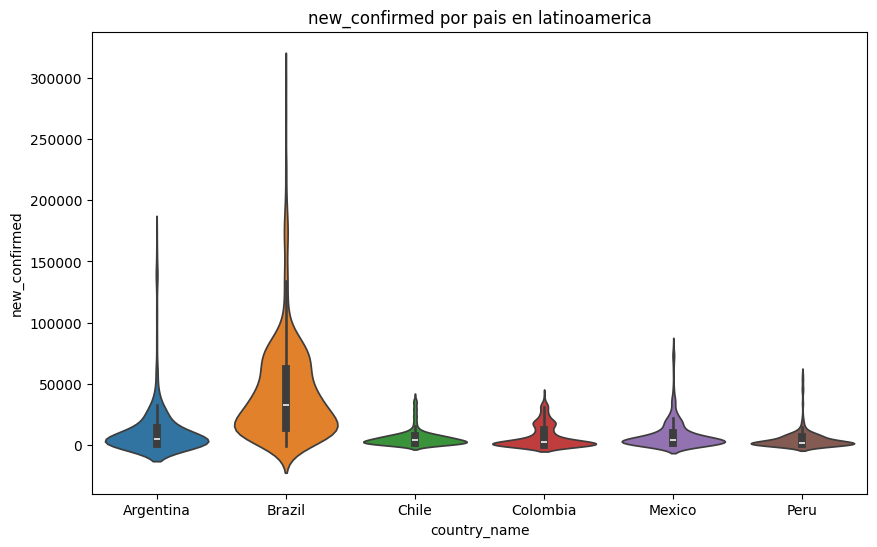

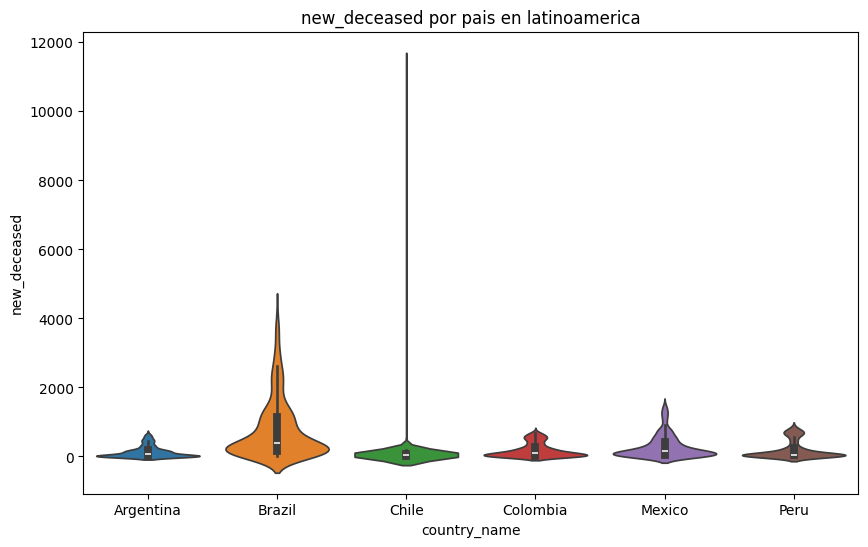

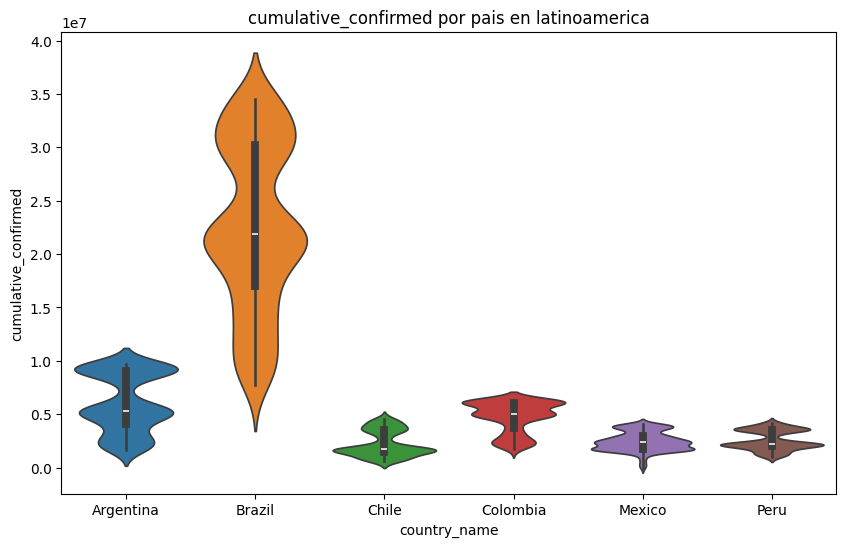

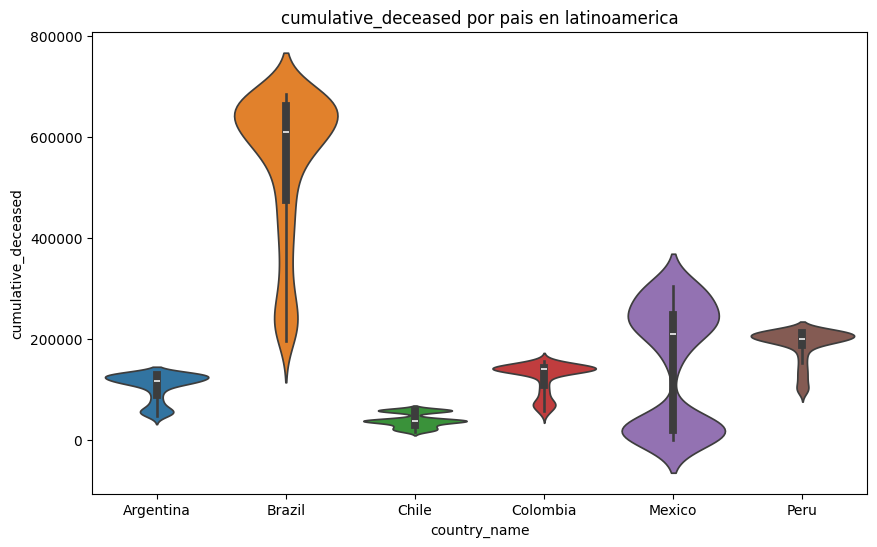

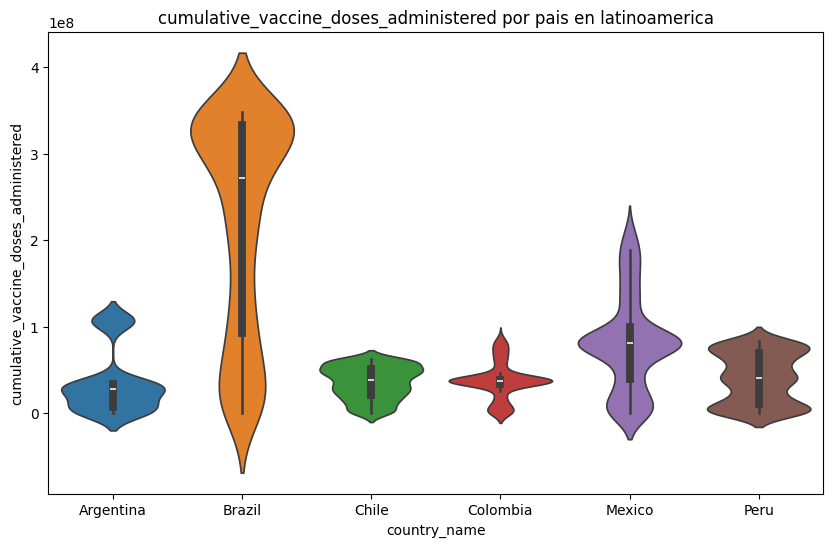

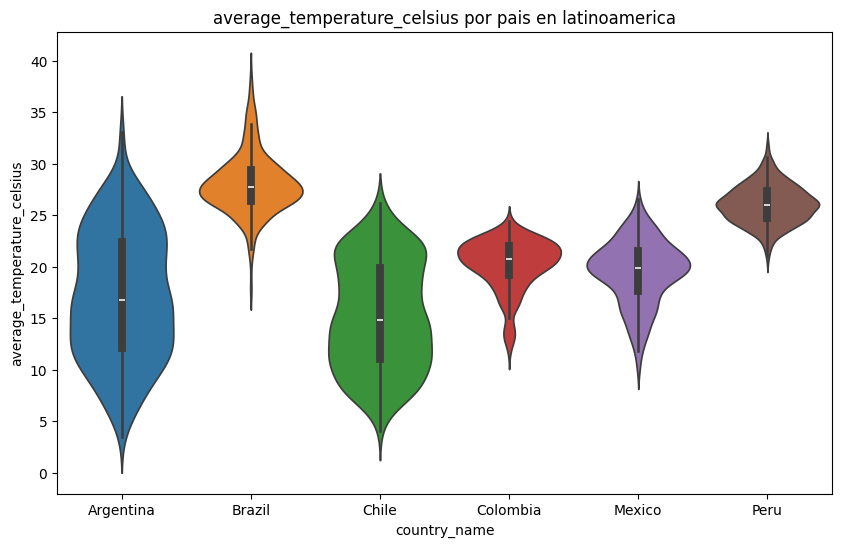

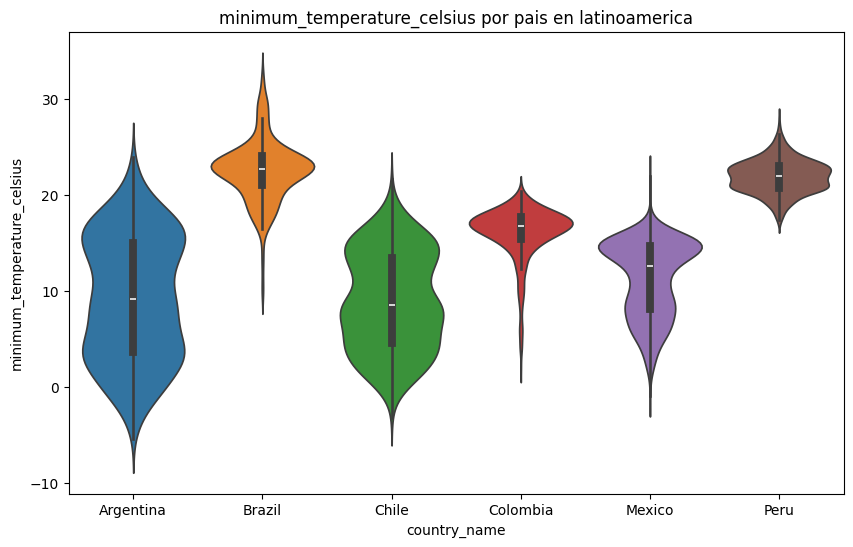

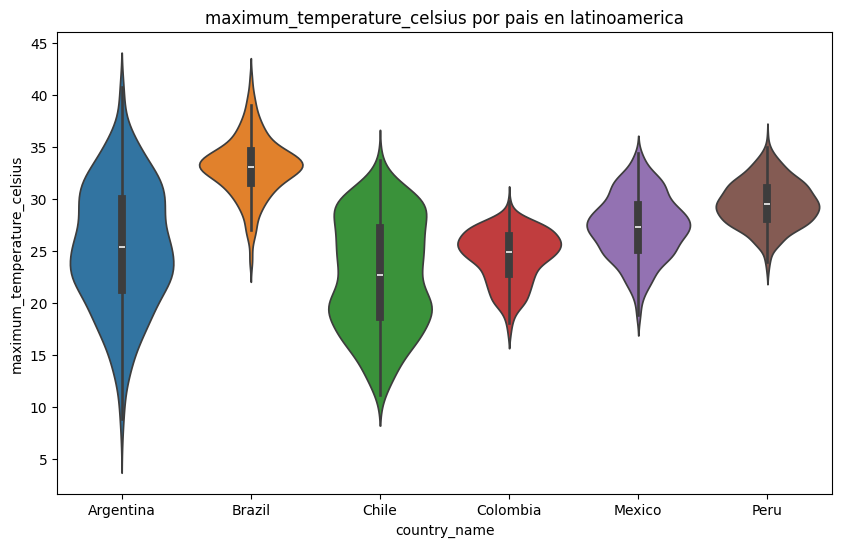

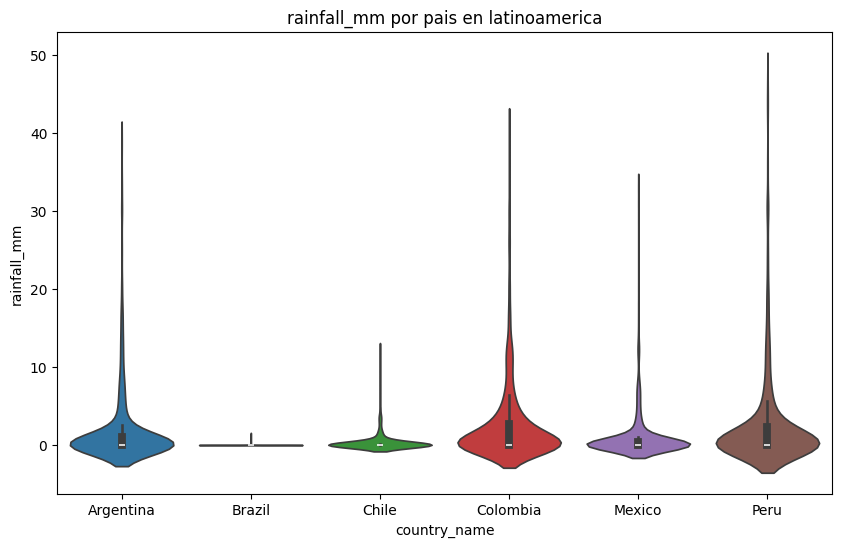

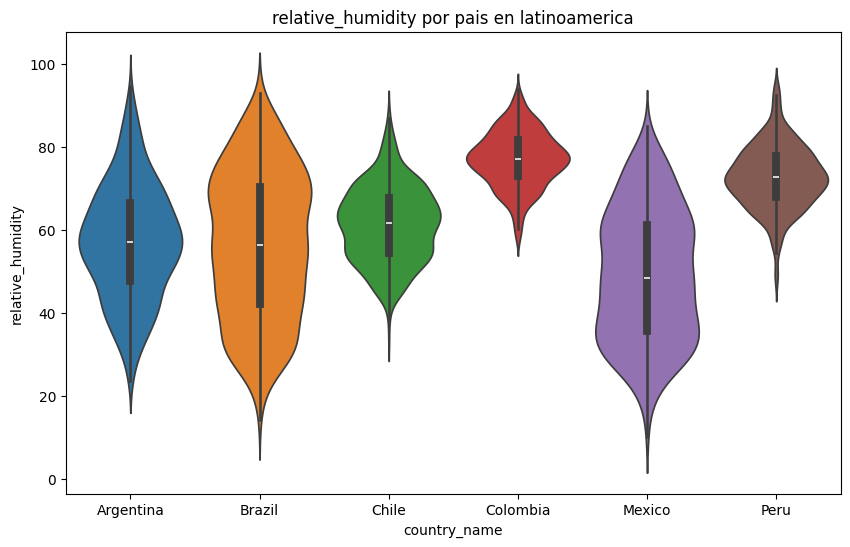

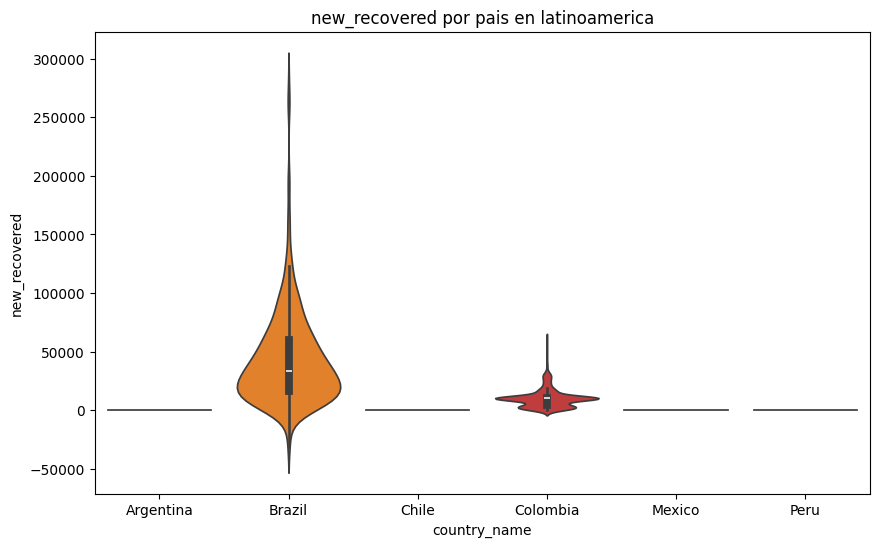

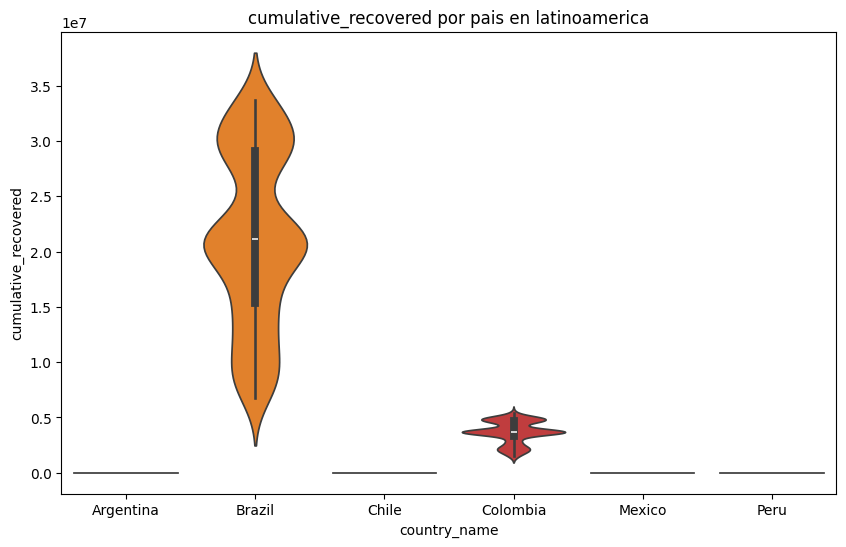

In [42]:
major_columns = []

for i in df_latam_paises.columns:
    # Agergamos las columnas que no estamos excluyendo 
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if df_latam_paises[i].nunique() > 6:
            # Si una columna tiene más de 6 valores únicos, se agrega a 'major_columns'.
            major_columns.append(i)

# Agregamos la columna 'country_name' de manera explicita 
major_columns.append('country_name')

# Creamos un nuevo DataFrame con las columnas identificadas
df_latam_paises_major = df_latam_paises[major_columns]

for i in df_latam_paises_major.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize = (10, 6))
        
        # Creacion de un diagrama en violin 
        sns.violinplot( x = 'country_name', 
                        y = i,
                        data = df_latam_paises_major,
                        hue = 'country_name')
        plt.title(f'{i} por pais en latinoamerica')
        plt.show()

Ahora se analizará la distribucion de la poblacion por grupos de edad en los paises seleccionados, de esta manera entenderemos como se comporta la poblacion en cada pais

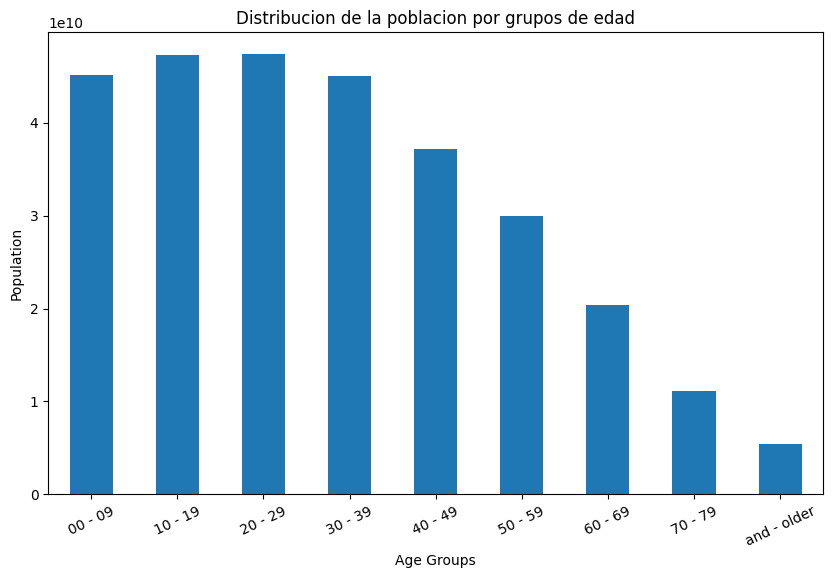

In [43]:
""" Calculamos la distribucion de la poblacion por grupos de edad """

# Creamos una lista que contenga el nombre de dichas columnas
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
               'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 
               'population_age_80_and_older']
# Sumamos la poblacion total para cada grupo de edad
age_distribution = df_latam_paises[age_columns].sum()

plt.figure(figsize = (10, 6))
# Creacion de un diagrama de barras apiladas 
age_distribution.plot(kind = 'bar', stacked = True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribucion de la poblacion por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + ' - ' + col.split('_')[-1] for col in age_columns], rotation = 25)

plt.show()

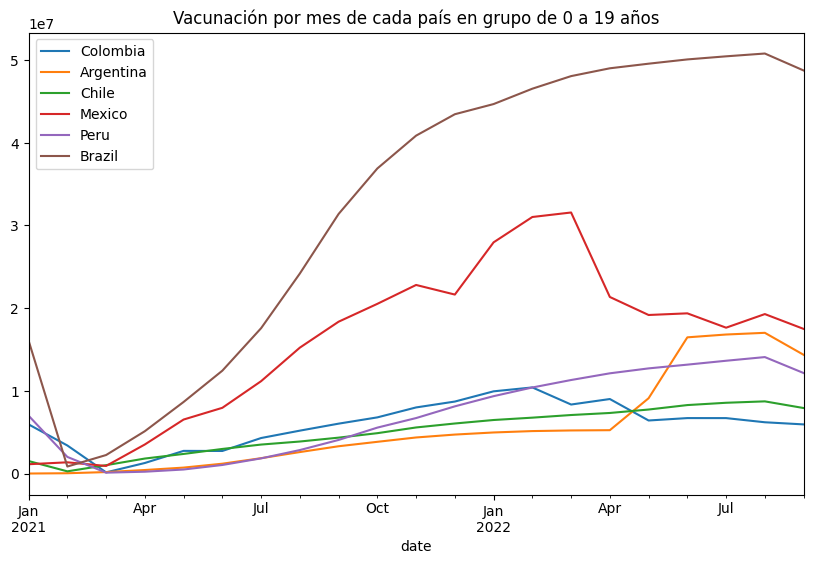

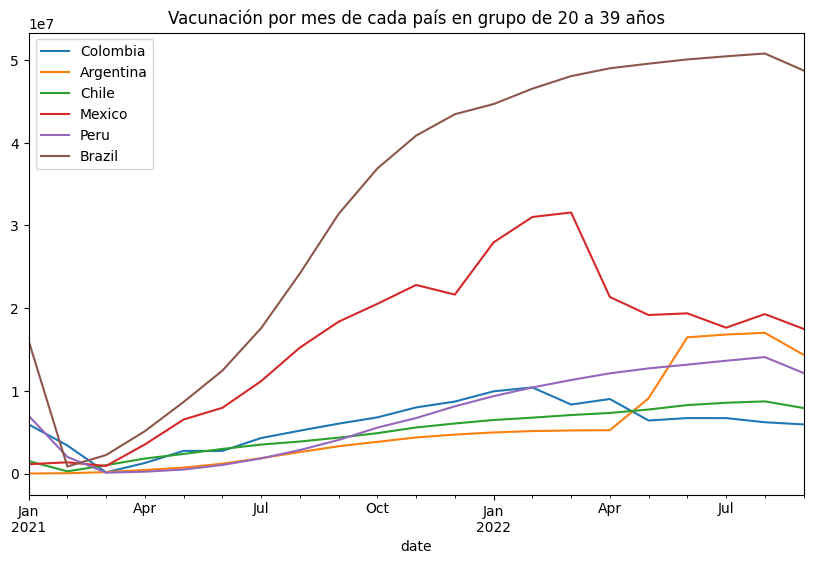

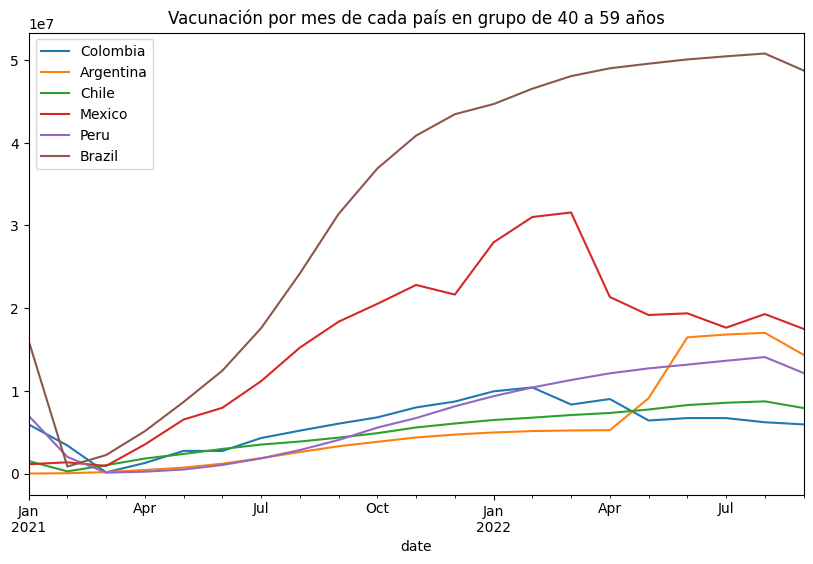

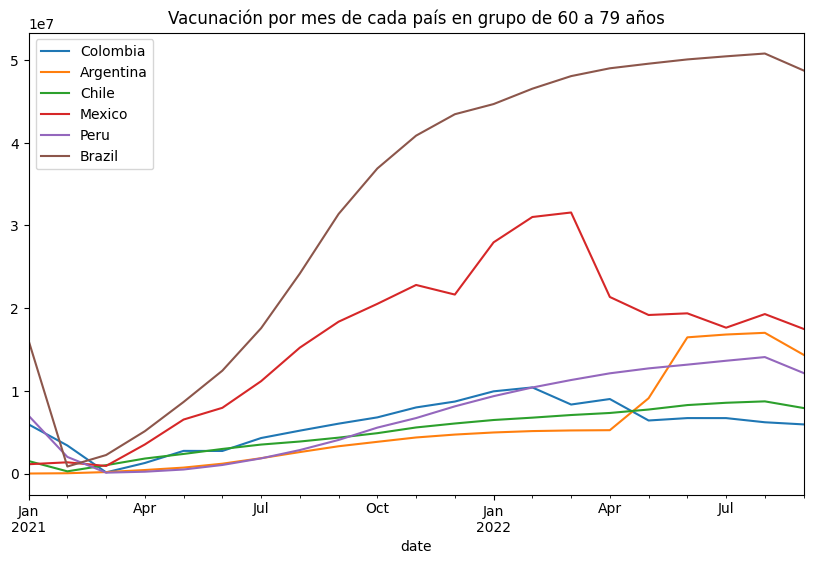

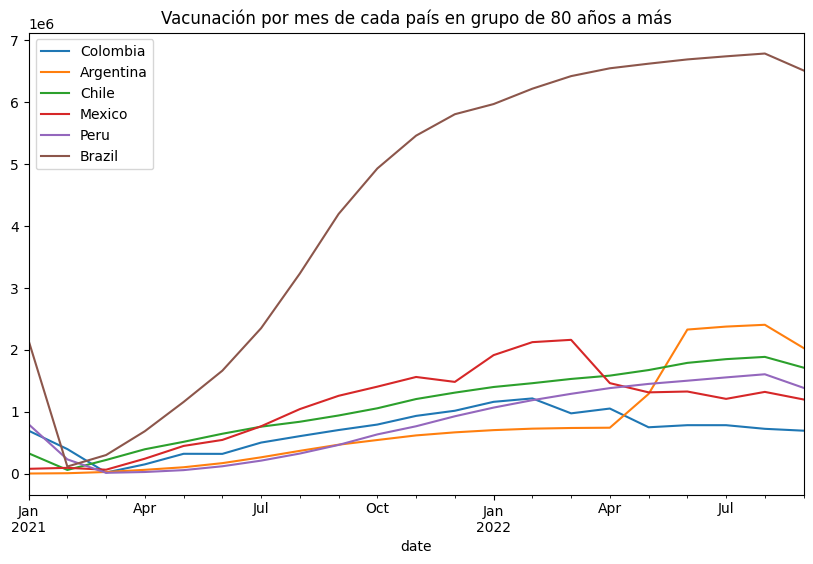

In [44]:
# Agrupamos en columnas la edad de 20 años
df_latam_paises['population_age_00_19'] = df_latam_paises['population_age_00_09'] + df_latam_paises['population_age_10_19']
df_latam_paises['population_age_20_39'] = df_latam_paises['population_age_20_29'] + df_latam_paises['population_age_30_39']
df_latam_paises['population_age_40_59'] = df_latam_paises['population_age_40_49'] + df_latam_paises['population_age_50_59']
df_latam_paises['population_age_60_79'] = df_latam_paises['population_age_60_69'] + df_latam_paises['population_age_70_79']
df_latam_paises['population_age_80_and_older'] = df_latam_paises['population_age_80_and_older']

# Agrupamos en columnas las dosis administradas por el rango de edad entre la poblacion
df_latam_paises['population_age_00_19_vacunados'] = df_latam_paises['cumulative_vaccine_doses_administered'] * df_latam_paises['population_age_10_19'] / df_latam_paises['population']
df_latam_paises['population_age_20_39_vacunados'] = df_latam_paises['cumulative_vaccine_doses_administered'] * df_latam_paises['population_age_20_39'] / df_latam_paises['population']
df_latam_paises['population_age_40_59_vacunados'] = df_latam_paises['cumulative_vaccine_doses_administered'] * df_latam_paises['population_age_40_59'] / df_latam_paises['population']
df_latam_paises['population_age_60_79_vacunados'] = df_latam_paises['cumulative_vaccine_doses_administered'] * df_latam_paises['population_age_60_79'] / df_latam_paises['population']
df_latam_paises['population_age_80_and_older_vacunados'] = df_latam_paises['cumulative_vaccine_doses_administered'] * df_latam_paises['population_age_80_and_older'] / df_latam_paises['population']

# Rellenamos los nulos con 0
df_latam_paises['population_age_00_19_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].fillna(0)
df_latam_paises['population_age_20_39_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].fillna(0)
df_latam_paises['population_age_40_59_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].fillna(0)
df_latam_paises['population_age_60_79_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].fillna(0)
df_latam_paises['population_age_80_and_older_vacunados'] = df_latam_paises['population_age_80_and_older_vacunados'].fillna(0)

# Convertimos el valor obtenido a entero
df_latam_paises['population_age_00_19_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].astype(int)
df_latam_paises['population_age_20_39_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].astype(int)
df_latam_paises['population_age_40_59_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].astype(int)
df_latam_paises['population_age_60_79_vacunados'] = df_latam_paises['population_age_00_19_vacunados'].astype(int)
df_latam_paises['population_age_80_and_older_vacunados'] = df_latam_paises['population_age_80_and_older_vacunados'].astype(int)

# Hacemos una sumatoria del grupo obtenido
df_latam_paises['population_age_00_19_vacunados'].sum()
df_latam_paises['population_age_20_39_vacunados'].sum()
df_latam_paises['population_age_40_59_vacunados'].sum()
df_latam_paises['population_age_60_79_vacunados'].sum()
df_latam_paises['population_age_80_and_older_vacunados'].sum()

fig, ax = plt.subplots(figsize = (10 ,6))
for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['population_age_00_19_vacunados'].plot()

plt.title('Vacunación por mes de cada país en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()


fig, ax = plt.subplots(figsize = (10 ,6))
for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['population_age_20_39_vacunados'].plot()

plt.title('Vacunación por mes de cada país en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()


fig, ax = plt.subplots(figsize = (10 ,6))
for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['population_age_40_59_vacunados'].plot()

plt.title('Vacunación por mes de cada país en grupo de 40 a 59 años')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()


fig, ax = plt.subplots(figsize = (10 ,6))
for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['population_age_60_79_vacunados'].plot()

plt.title('Vacunación por mes de cada país en grupo de 60 a 79 años')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()


fig, ax = plt.subplots(figsize = (10 ,6))
for pais in paises_selecionados:
    df_latam_paises[df_latam_paises['country_name'] == pais].resample('ME').mean(numeric_only = True)['population_age_80_and_older_vacunados'].plot()

plt.title('Vacunación por mes de cada país en grupo de 80 años a más')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.legend(paises_selecionados)
plt.show()

Ahora realizaremos un analisis de mortalidad por genero para identificar la poblacion mas vulnerable en cada pais

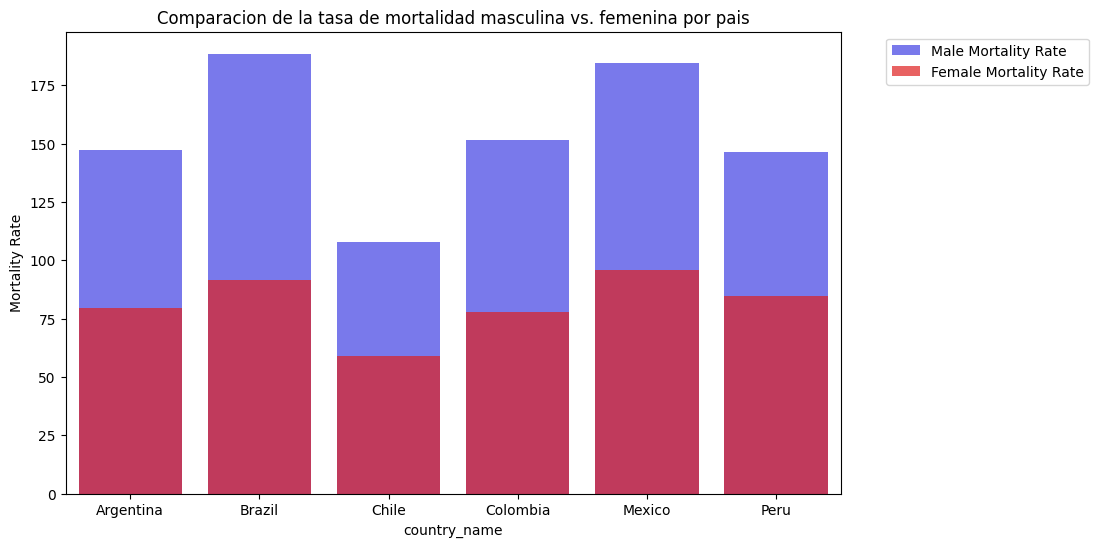

In [45]:
plt.figure(figsize = (10, 6))

# Hacemos una sobreposicion para visualizar la cantidad de mortalidad de ambos genero
sns.barplot(data = df_latam_paises, 
            x = 'country_name', 
            y = 'adult_male_mortality_rate',
            color = 'blue', 
            alpha = 0.6,
            label = 'Male Mortality Rate')

sns.barplot(data = df_latam_paises, 
            x = 'country_name', 
            y = 'adult_female_mortality_rate',
            color = 'red', 
            alpha = 0.7,
            label = 'Female Mortality Rate')

plt.xticks(rotation = 0)
plt.ylabel('Mortality Rate')
plt.title('Comparacion de la tasa de mortalidad masculina vs. femenina por pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


De acuerdo con la grafica de mortalidad, podemos observar que en todos los paises la cantiadad con mayor muerte son los hombres, de esto analizamos que los hombres son más vulnerables a la emfermedad

Ahora realizaremos un grafico en donde visualizaremos emfermedades pre-existentes

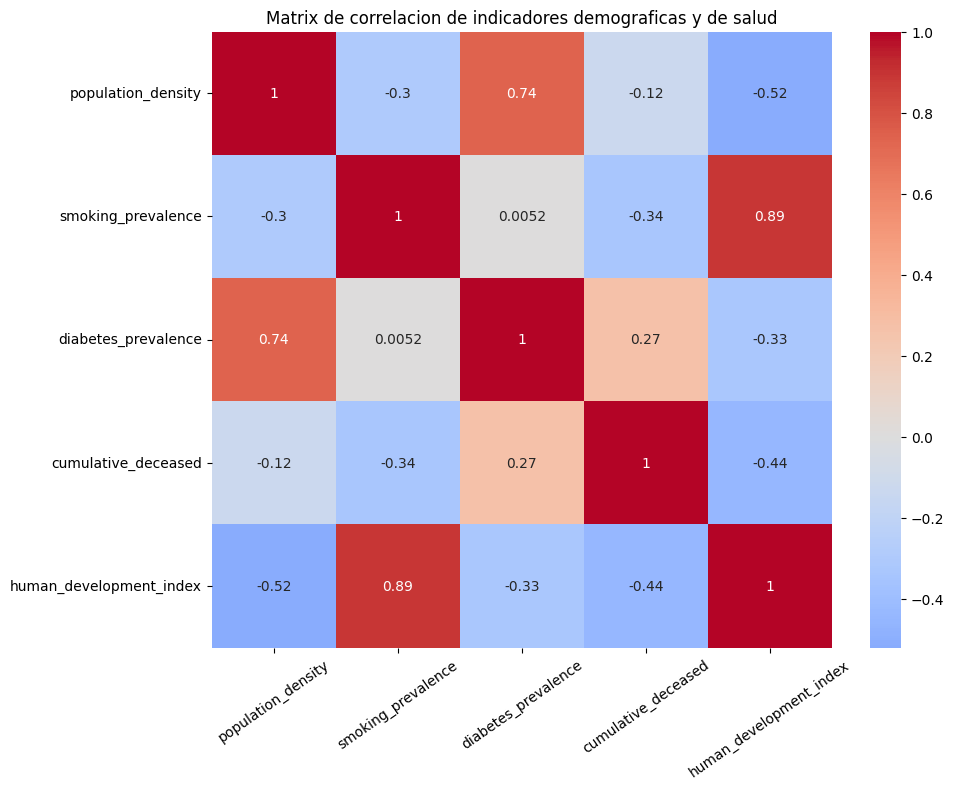

In [46]:
# Correlacion de datos de salud
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = df_latam_paises[columns].corr()

plt.figure(figsize = (10, 8))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0)

plt.xticks(rotation = 35)
plt.title('Matrix de correlacion de indicadores demograficas y de salud')
plt.show()

Observamos que el fumar y tener diabetes son enfermedades pre-existentes que más afectan a la poblacion en los paises selecionados.  
Con ello afirmamos que estas emfermedades ha causado más muertes en los paises seleccionados.

Ahora analizaremos la prevalencia de Diabetes y la tasa de mortalidad por COVID 19

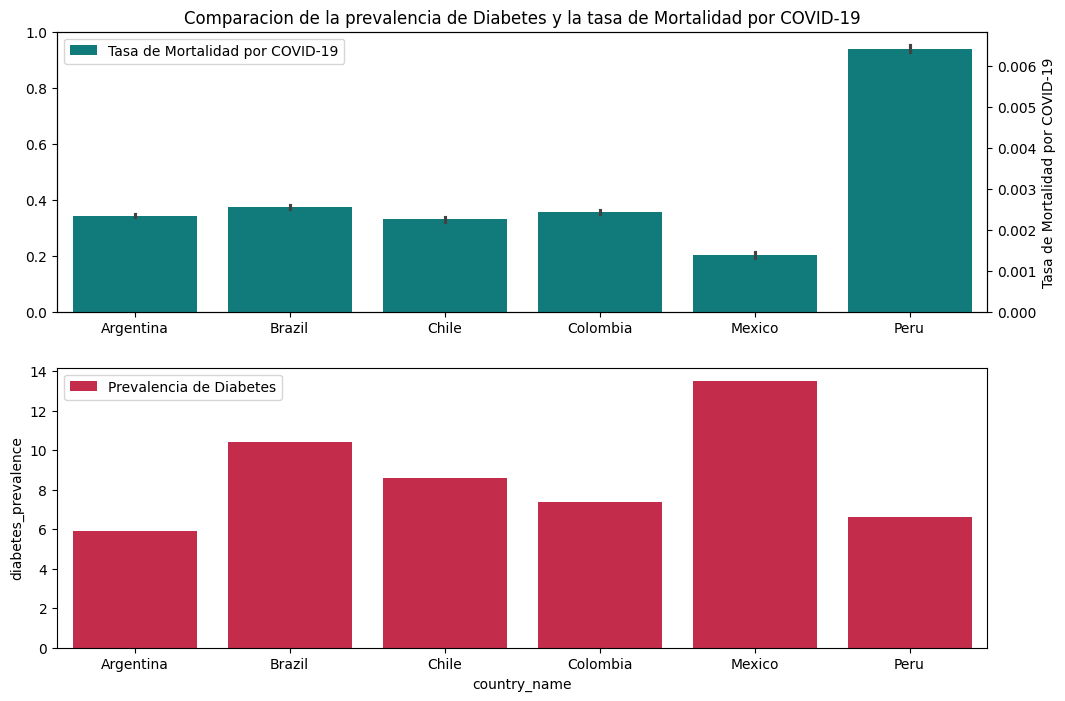

In [47]:
# Creamos una figura con 2 filas 
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (12, 8))

# Creamos 2 graficos de barras separados 
sns.barplot(data = df_latam_paises, 
            x = df_latam_paises['country_name'], 
            y = df_latam_paises['diabetes_prevalence'], 
            color = '#DC143C', 
            label = 'Prevalencia de Diabetes')

# Esta línea crea un segundo eje y que comparte el mismo eje x con ax
ax2 = ax.twinx()

sns.barplot(data = df_latam_paises, 
            x = df_latam_paises['country_name'], 
            y = df_latam_paises['cumulative_deceased'] / df_latam_paises['population'],
            color = '#008B8B',
            label = 'Tasa de Mortalidad por COVID-19',
            ax = ax2)

plt.xticks(rotation = 90)
#ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparacion de la prevalencia de Diabetes y la tasa de Mortalidad por COVID-19')
plt.show()

Ahora analizaremos la prevalencia de Fumar y la tasa de mortalidad por COVID 19

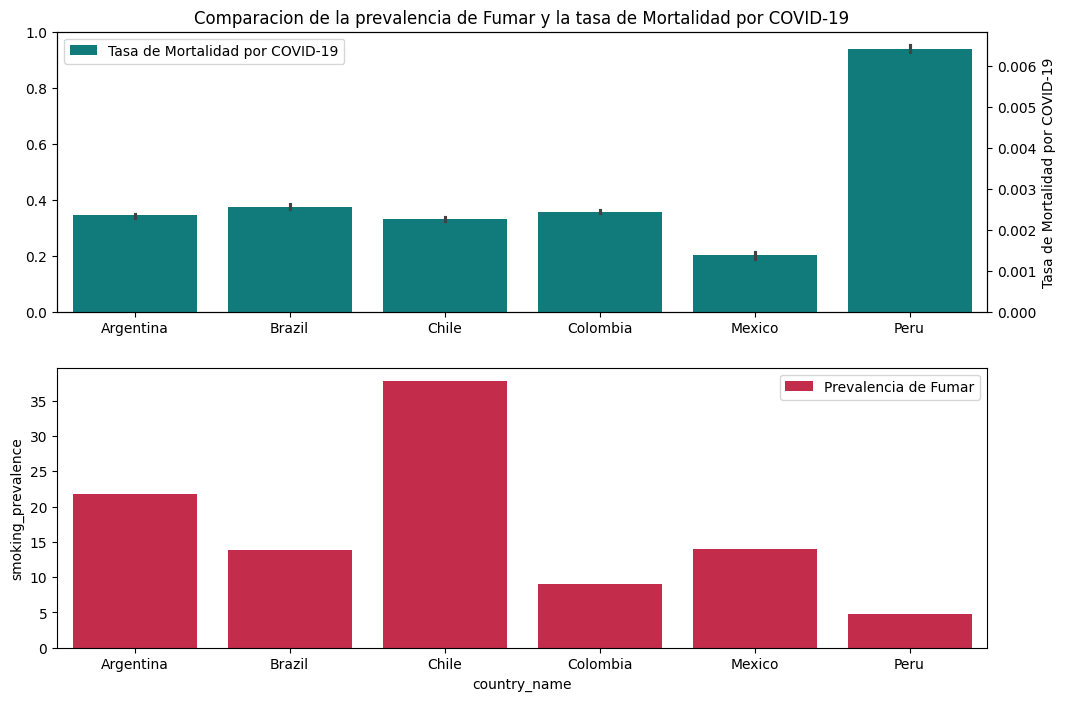

In [48]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (12, 8))

sns.barplot(data = df_latam_paises, 
            x = df_latam_paises['country_name'], 
            y = df_latam_paises['smoking_prevalence'], 
            color = '#DC143C', 
            label = 'Prevalencia de Fumar')

ax2 = ax.twinx()

sns.barplot(data = df_latam_paises, 
            x = df_latam_paises['country_name'], 
            y = df_latam_paises['cumulative_deceased'] / df_latam_paises['population'],
            color = '#008B8B',
            label = 'Tasa de Mortalidad por COVID-19',
            ax = ax2)

plt.xticks(rotation = 90)
#ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparacion de la prevalencia de Fumar y la tasa de Mortalidad por COVID-19')
plt.show()

Ambas emfermedades nuestran un comportamiento simmilar en los paises seleccionados, sin embargo se observa que la diabetes es la emfermedad que ha causado más cantidad de muertes

Se puede llegar a la conclusion de este avance que los paises que necesitan más ayuda es Brasil, Mexico y Colombia, ya que muestran mas casos de muertes y con menos administracion de dosis

### Avance N°3 - EDA con Numpy y Pandas

Se realizará un analisis del comportamiento de manera semanal y anual, para esto se agrupará los datos por semana y por año

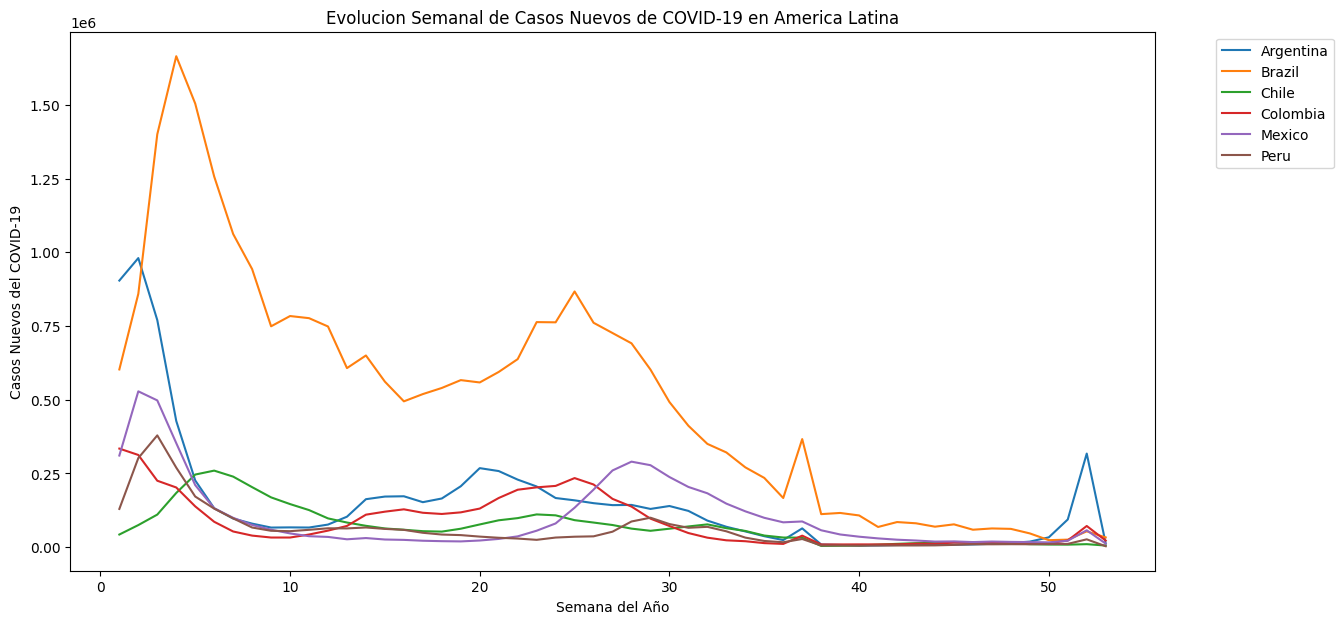

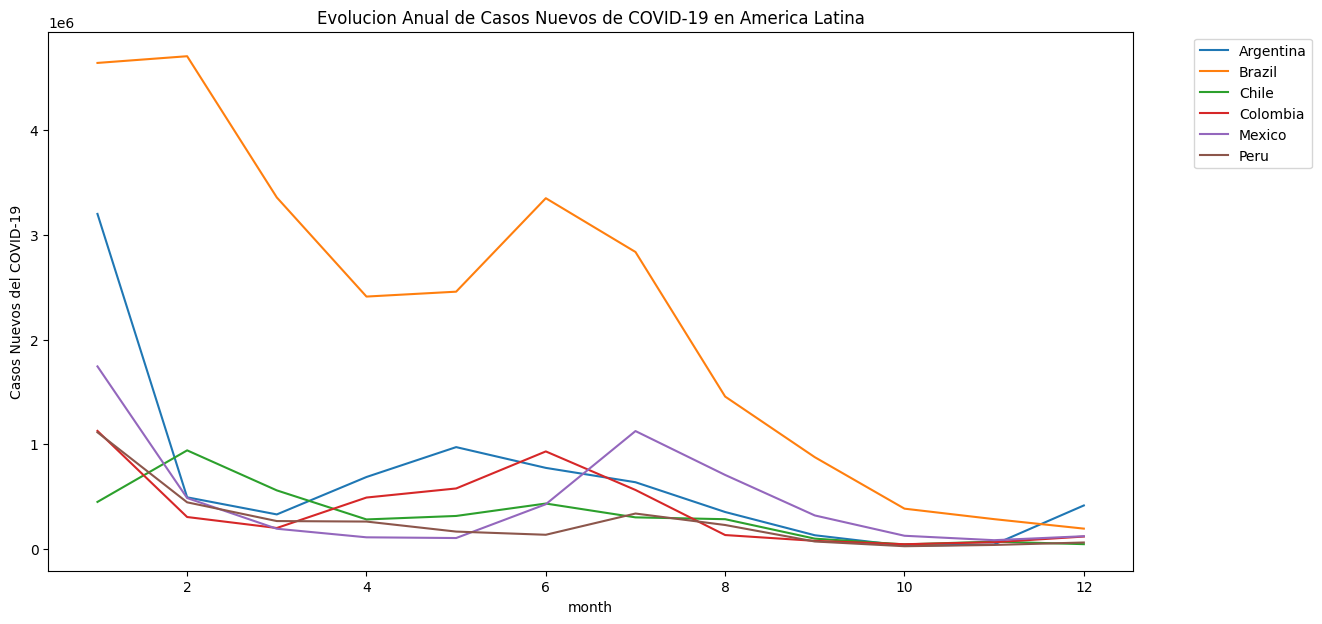

In [49]:
""" Analisis de la evolucion semanal de casos nuevos de COVID 19 """
# Obtnemos el numero de semanas del año en una nueva columna
df_latam_paises['week'] = df_latam_paises.index.isocalendar().week
# Agrupamos por nombre de pais y el numero de semana, calculamos la suma 
weekly_cases = df_latam_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

plt.figure(figsize = (14, 7))

for country in weekly_cases['country_name'].unique():
    # Obtenemos los datos relacionados con el pais actual 
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    # Se realiza un grafico de linea donde muestra la evolucion semanal
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label = country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos del COVID-19')
plt.title('Evolucion Semanal de Casos Nuevos de COVID-19 en America Latina')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


""" Analisis de la evolucion anual de casos nuevos de COVID 19 """
df_latam_paises['month'] = df_latam_paises.index.month
yearly_cases = df_latam_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

plt.figure(figsize = (14, 7))

for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label = country)

plt.xlabel('month')
plt.ylabel('Casos Nuevos del COVID-19')
plt.title('Evolucion Anual de Casos Nuevos de COVID-19 en America Latina')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

Se observa que a lo largo del tiempo la cantidad de casos confirmados y muertes ha disminuido.

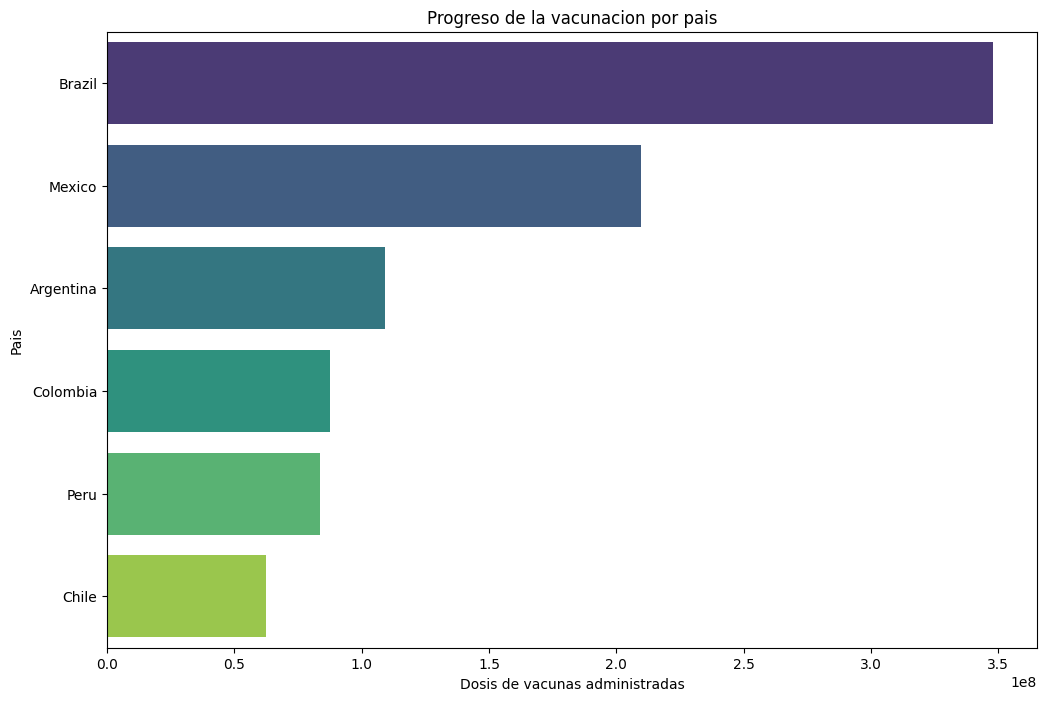

In [50]:
# Agrupamos por pais y escogemos el valor maximo, luego mostramos los paises mas vacunados 
vaccination_data = df_latam_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending = False)

plt.figure(figsize = (12, 8))

sns.barplot(x = vaccination_data, 
            y = vaccination_data.index, 
            hue = vaccination_data.index, 
            palette = 'viridis')

plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de la vacunacion por pais')
plt.show()

El país con mayor dosis administradas ha sido Brasil, seguido de Mexico y Argentina

Realizaremos un analisis del comportamiento de temperatura en los paises seleccionados

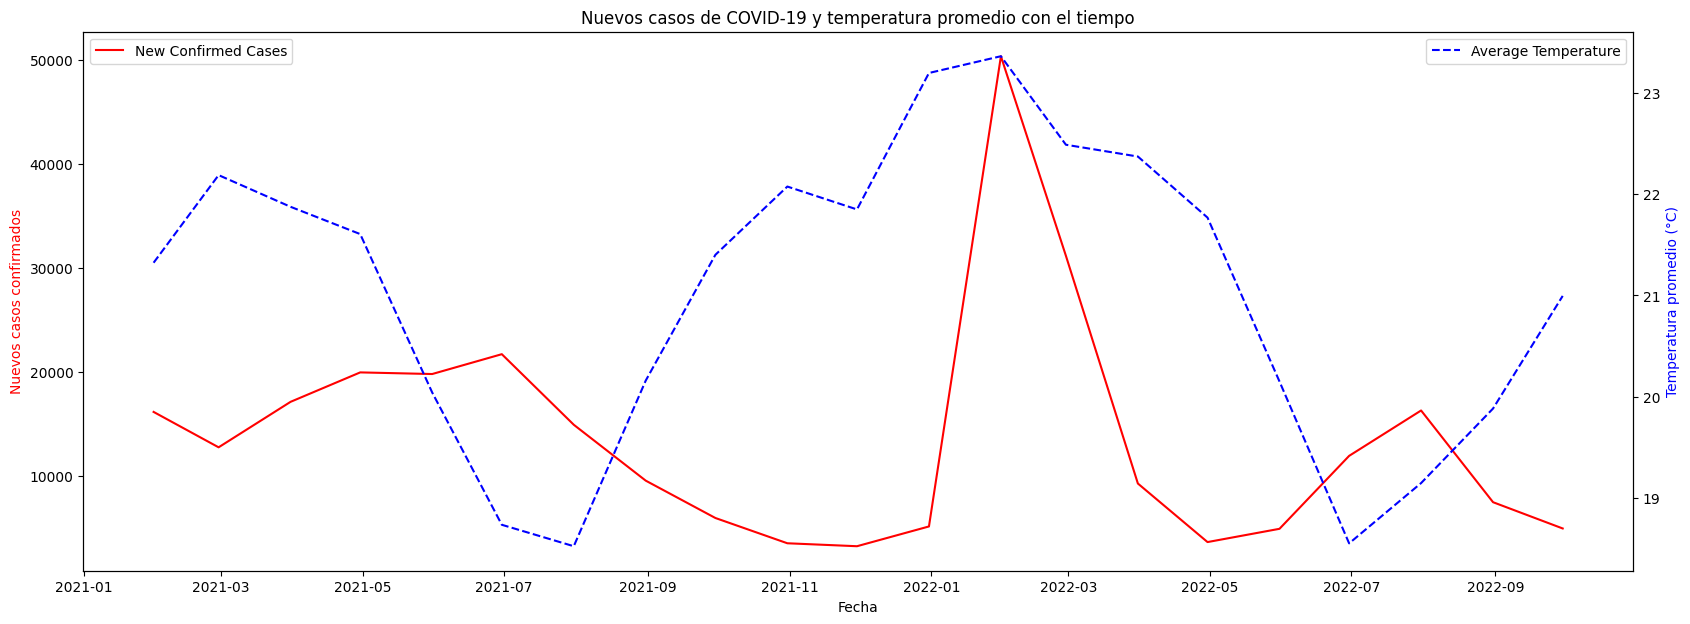

In [51]:
# Se grafica la realcion entre la temperatura promedio y los nuevos casos confirmados de COVID 19
plt.figure(figsize = (20, 7))

# Obtiene el eje principal (ax1) de la figura actual
ax1 = plt.gca()
#  Crea un eje secundario (ax2) asociado con el mismo eje x que el principal (ax1)
ax2 = ax1.twinx()

ax1.plot(df_latam_paises.resample('ME').mean(numeric_only = True).index, 
         # El promedio de nuevos casos confirmados por mes
         df_latam_paises.resample('ME').mean(numeric_only = True)['new_confirmed'], 
         color = 'red', 
         label = 'New Confirmed Cases')

ax2.plot(df_latam_paises.resample('ME').mean(numeric_only = True).index, 
         # La temperatura promedio (°C) por mes
         df_latam_paises.resample('ME').mean(numeric_only = True)['average_temperature_celsius'], 
         color = 'blue', 
         label = 'Average Temperature', 
         linestyle = '--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color = 'red')
ax2.set_ylabel('Temperatura promedio (°C)', color = 'blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.show()

Se observa que la temperatura promedio ha ido aumentando y los casos confirmados ha ido disminuyendo.  
Tambien visualizamos que en el mes de Marzo hubo un decrecimiento, probablemente esto se de a la cantidad de vacunas administradas

Cada pais tiene un impacto debido a la urbanizacion y la densidad de poblacion

C:\Users\luisv\AppData\Local\Temp\ipykernel_25492\2719945058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = urban_cases['urban_population_percentage'],


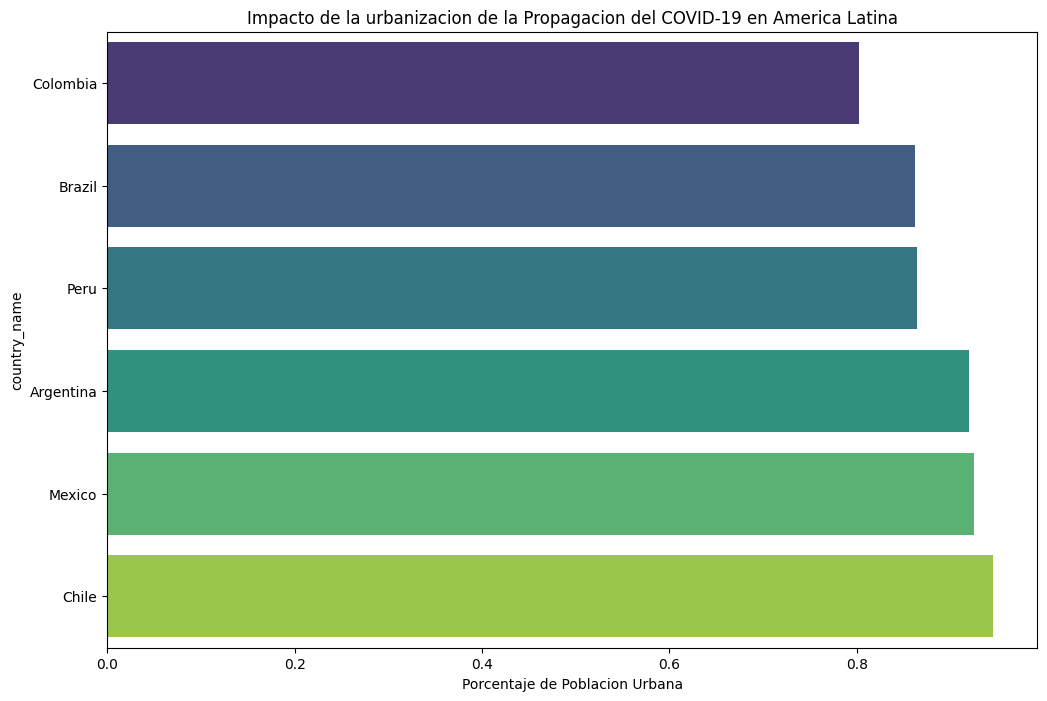

In [52]:
# Creacion de la columna 'urban_population_percentage'
df_latam_paises['urban_population_percentage'] = df_latam_paises['population_urban'] / df_latam_paises['population']
# Agrupamos el pais y el ultimo valor, ordenandolo con el porcentaje de la poblacion
urban_cases = df_latam_paises.groupby('country_name').last().sort_values(by = 'urban_population_percentage')

plt.figure(figsize = (12, 8))

# Creacion de grafico de barras
sns.barplot(x = urban_cases['urban_population_percentage'], 
            y = urban_cases.index, 
            palette = 'viridis')

plt.xlabel('Porcentaje de Poblacion Urbana')
plt.title('Impacto de la urbanizacion de la Propagacion del COVID-19 en America Latina')
plt.show()

El pais con mayor impacto en la propagacion fue Chile, aunque en graficos anteriores ha demostrado que tambien ha tenido un mejor manejo de la pandemia

Visualizaremos la densidad de poblacion por grupos de edad

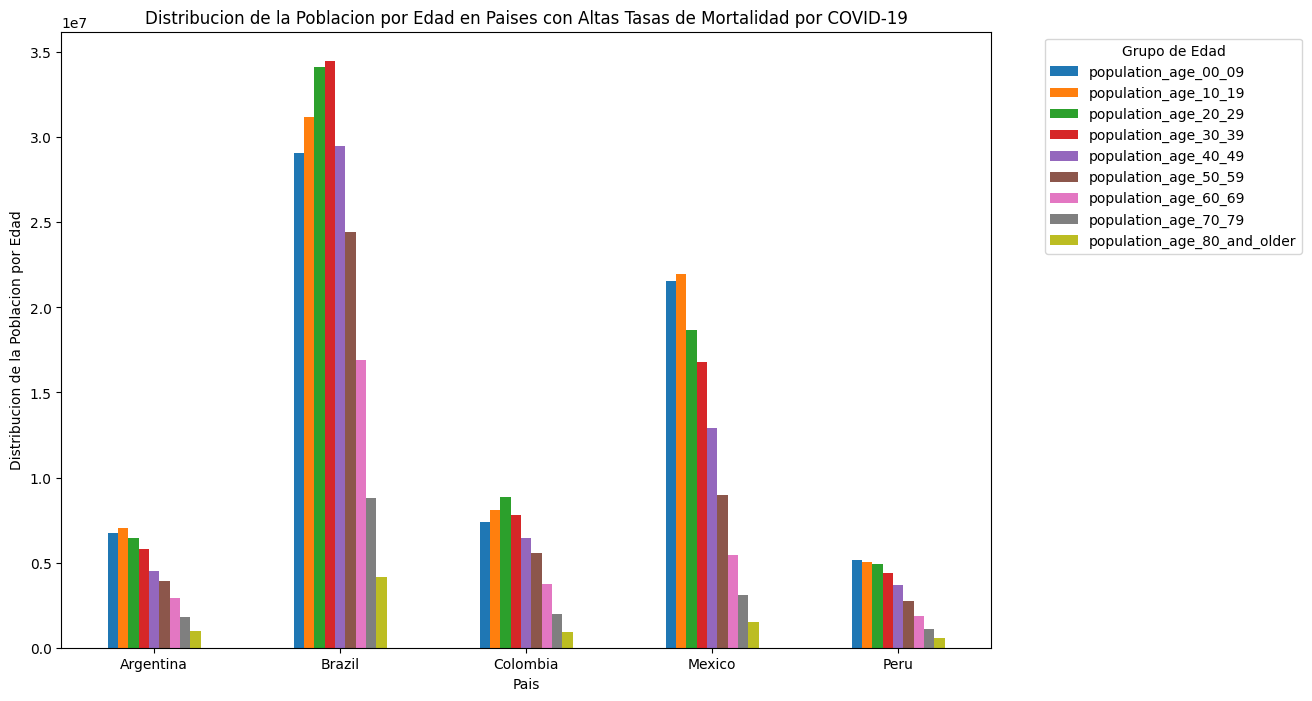

In [53]:
# Agrupamos por pais lo decesos acumulados, promediamos y obtenemos el valor maximo 
high_mortality_countries = df_latam_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending = False).head(5).index
# Definimos los grupos por edad
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
              'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 
              'population_age_80_and_older']
age_distribution = df_latam_paises[df_latam_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind = 'bar', stacked = False, figsize = (12, 8))

plt.xlabel('Pais')
plt.ylabel('Distribucion de la Poblacion por Edad')
plt.xticks(rotation = 0)
plt.title('Distribucion de la Poblacion por Edad en Paises con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', title = 'Grupo de Edad')
plt.show()

Visualizamos una muestra en la desigualdad de cantidades de poblacion por grupos de edad en los paises seleccionados

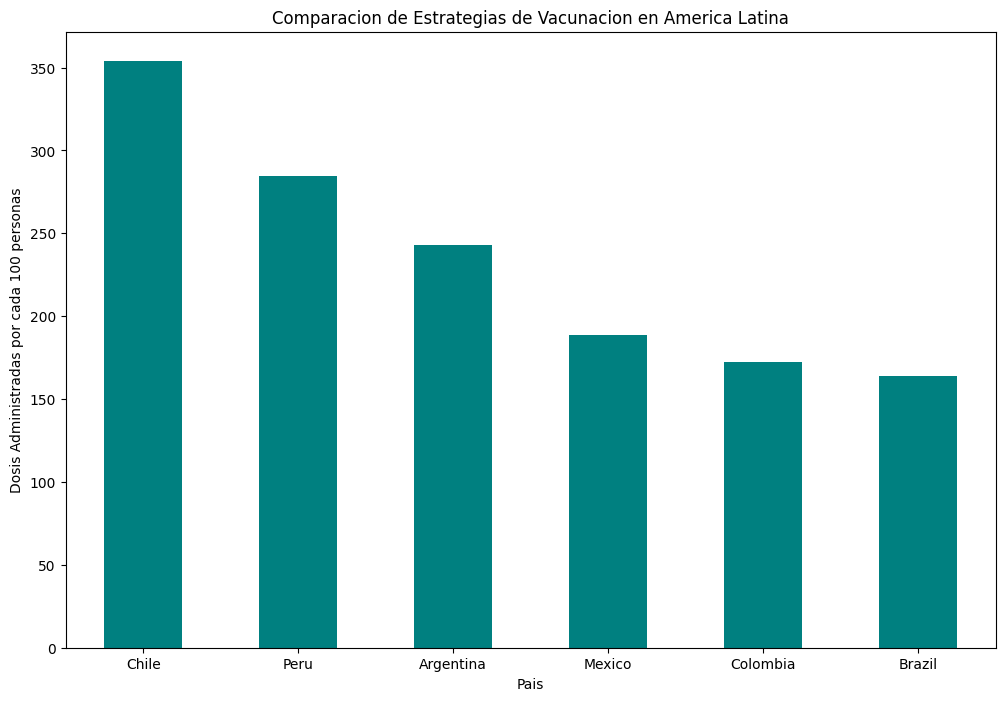

In [54]:
# Agrupamos por pais las dosis acumuladas, tomando el valor maximo donde lo dividimos por la poblacion de su pais respecivamente 
vaccination_strategy = df_latam_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / df_latam_paises.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 8), color = 'teal')

plt.xlabel('Pais')
plt.ylabel('Dosis Administradas por cada 100 personas')
plt.xticks(rotation = 0)
plt.title('Comparacion de Estrategias de Vacunacion en America Latina')
plt.show()

Vemos que Chile tiene un mejor resutado a comparado de Colombia y Brasil  
Con esto verificamos cuales son los paises que necesita ayuda y donde se deberian crear nuevos centros

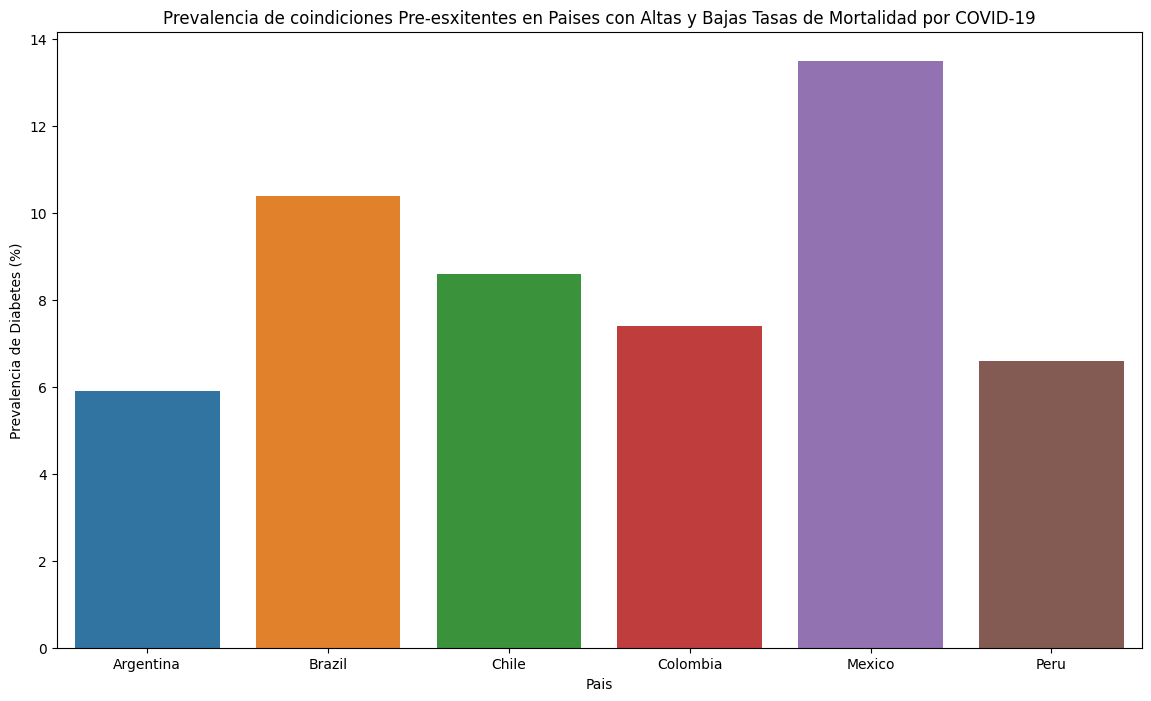

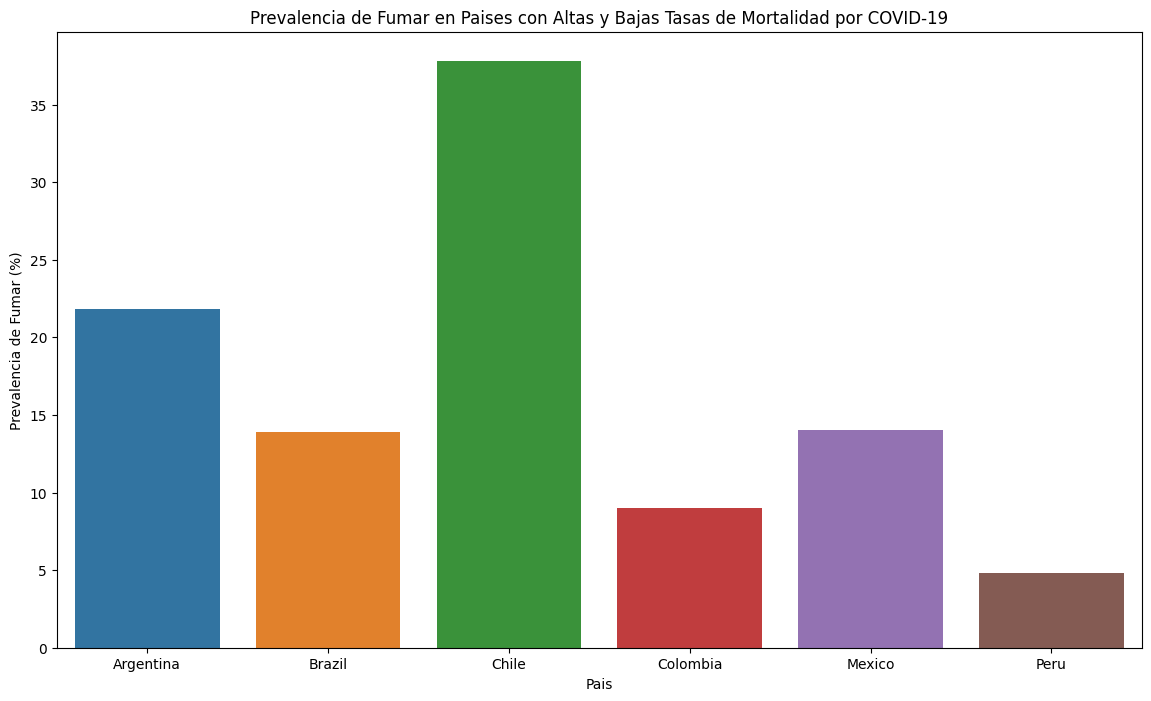

In [55]:
# Agrupando por paises tanto los 5 valores más grandes y los 5 valores más bajos
top_countries = df_latam_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = df_latam_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = df_latam_paises[df_latam_paises['country_name'].isin(top_countries.union(bottom_countries))]

# Prevalencia de Diabetes
plt.figure(figsize = (14, 8))
sns.barplot(data = conditions_data, 
            x = 'country_name', 
            y = 'diabetes_prevalence', 
            hue = 'country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de coindiciones Pre-esxitentes en Paises con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Prevalencia de Fumar
plt.figure(figsize = (14, 8))
sns.barplot(data = conditions_data, 
            x = 'country_name', 
            y = 'smoking_prevalence', 
            hue = 'country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Paises con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

* Se visualiza que la diabetes a afectado mucho más a Mexico y Brasil, con ello afirmamos que estos paises han sufrido más por dicha emfermedad
* Se visualiza que el fumar a afectado mucho más a Chile y Argentina, con ello afirmamos que estos paises han sufrido más por el fumar

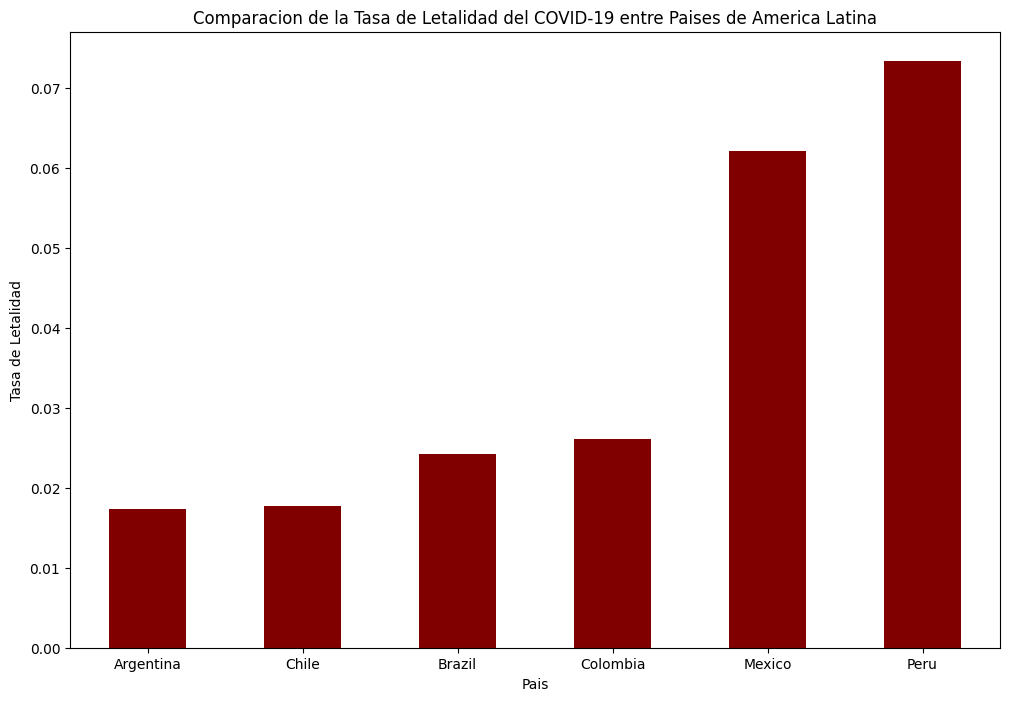

In [56]:
# Creacion de la columna 'case_fatality_rate'
df_latam_paises['case_fatality_rate'] = df_latam_paises['cumulative_deceased'] / df_latam_paises['cumulative_confirmed']
fatality_rates = df_latam_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Fatalidad por pais
plt.figure(figsize = (12, 8))
fatality_rates.plot(kind = 'bar', color = 'maroon')
plt.xlabel('Pais')
plt.ylabel('Tasa de Letalidad')
plt.xticks(rotation = 0)
plt.title('Comparacion de la Tasa de Letalidad del COVID-19 entre Paises de America Latina')
plt.show()

Visualizamos que tanto Perú como Mexico tuvieron una Tasa de Letalidad alta

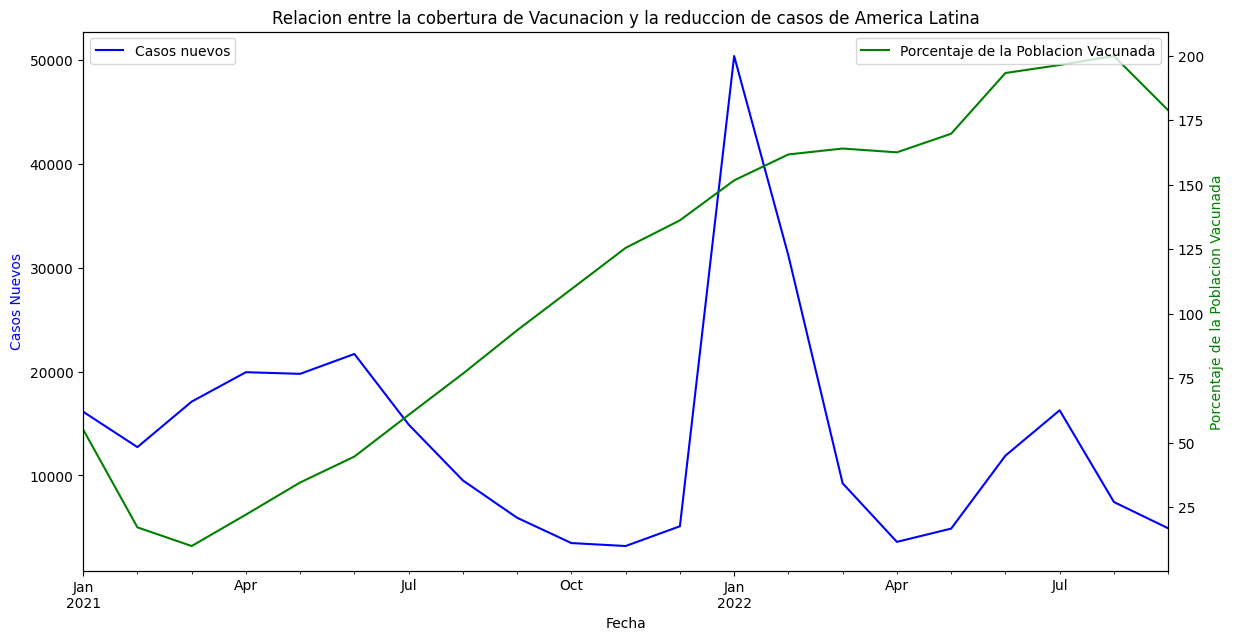

In [57]:
# Evolucion de la vacunacion en LATAM y la reduccion de casos de COVID 19
plt.figure(figsize = (14, 7))
ax1 = plt.gca()
# Creamos un gemelo para ax2 con ax1, de esta manera utilizamos un grafico
ax2 = ax1.twinx()

# Creacion de porcentajes de vacunacion
df_latam_paises['percentage_vaccinated'] = df_latam_paises['cumulative_vaccine_doses_administered'] / df_latam_paises['population'] * 100
df_latam_paises.resample('ME').mean(numeric_only = True)['new_confirmed'].plot(ax = ax1, color = 'blue', label = 'Casos nuevos')
df_latam_paises.resample('ME').mean(numeric_only = True)['percentage_vaccinated'].plot(ax = ax2, color = 'green', label = 'Porcentaje de la Poblacion Vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color = 'blue')
ax2.set_ylabel('Porcentaje de la Poblacion Vacunada', color = 'green')
ax1.set_title('Relacion entre la cobertura de Vacunacion y la reduccion de casos de America Latina')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.show()

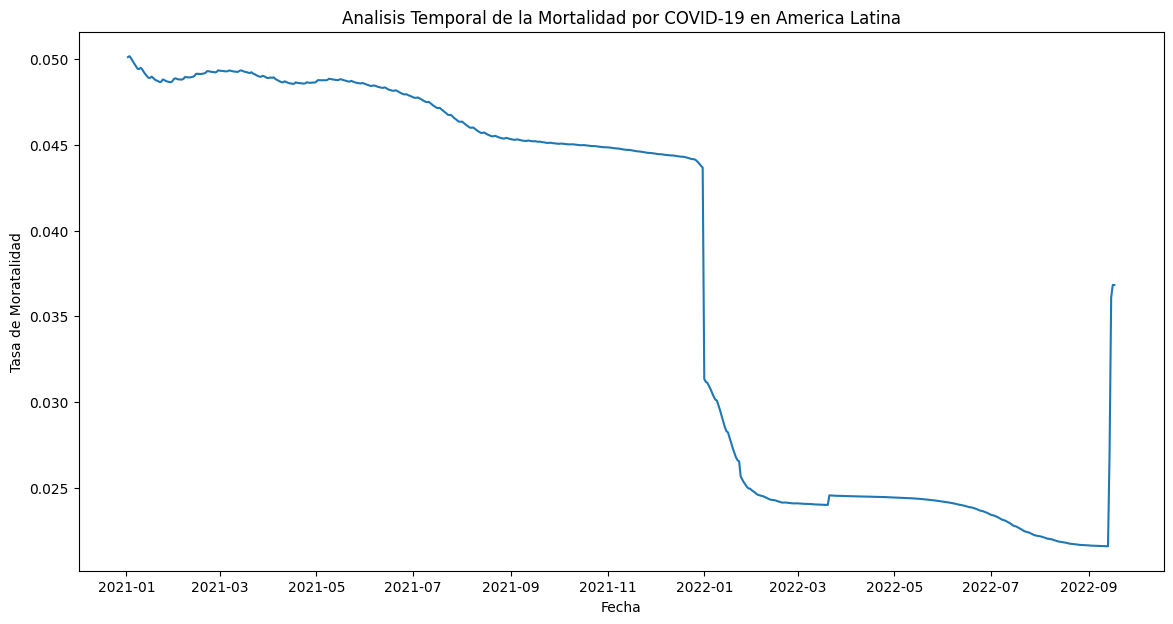

In [58]:
# Evolucion de la mortalidad
df_latam_paises['mortality_rate'] = df_latam_paises['cumulative_deceased'] / df_latam_paises['cumulative_confirmed']

plt.figure(figsize = (14, 7))
sns.lineplot(data = df_latam_paises, 
             x = 'date', 
             y = 'mortality_rate', 
             estimator = 'mean',
             errorbar = None)
plt.title('Analisis Temporal de la Mortalidad por COVID-19 en America Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Moratalidad')
plt.show()

Se observa que los casos activos han disminuido y los casos recuperados han aumentado, esto debido a la vacunacion y las medidas tomadas

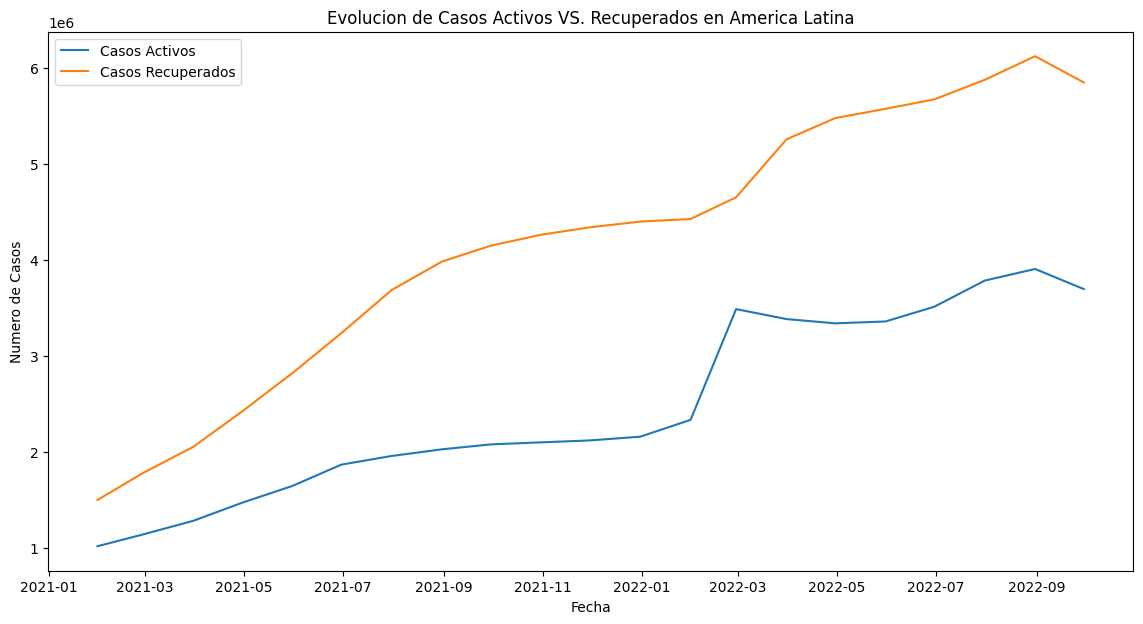

In [59]:
# Creacion de la columna 'active_cases'  
df_latam_paises['active_cases'] = df_latam_paises['cumulative_confirmed'] - df_latam_paises['cumulative_deceased'] - df_latam_paises['cumulative_recovered']

plt.figure(figsize = (14, 7))

# Resumimos por mes el promedio de la columna especificada en un grafico de lineas
sns.lineplot(data = df_latam_paises.resample('ME').mean(numeric_only = True), 
             x = 'date', 
             y = 'active_cases', 
             label = 'Casos Activos')

sns.lineplot(data = df_latam_paises.resample('ME').mean(numeric_only = True), 
             x = 'date', 
             y = 'cumulative_recovered', 
             label = 'Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')
plt.title('Evolucion de Casos Activos VS. Recuperados en America Latina')
plt.legend()
plt.show()

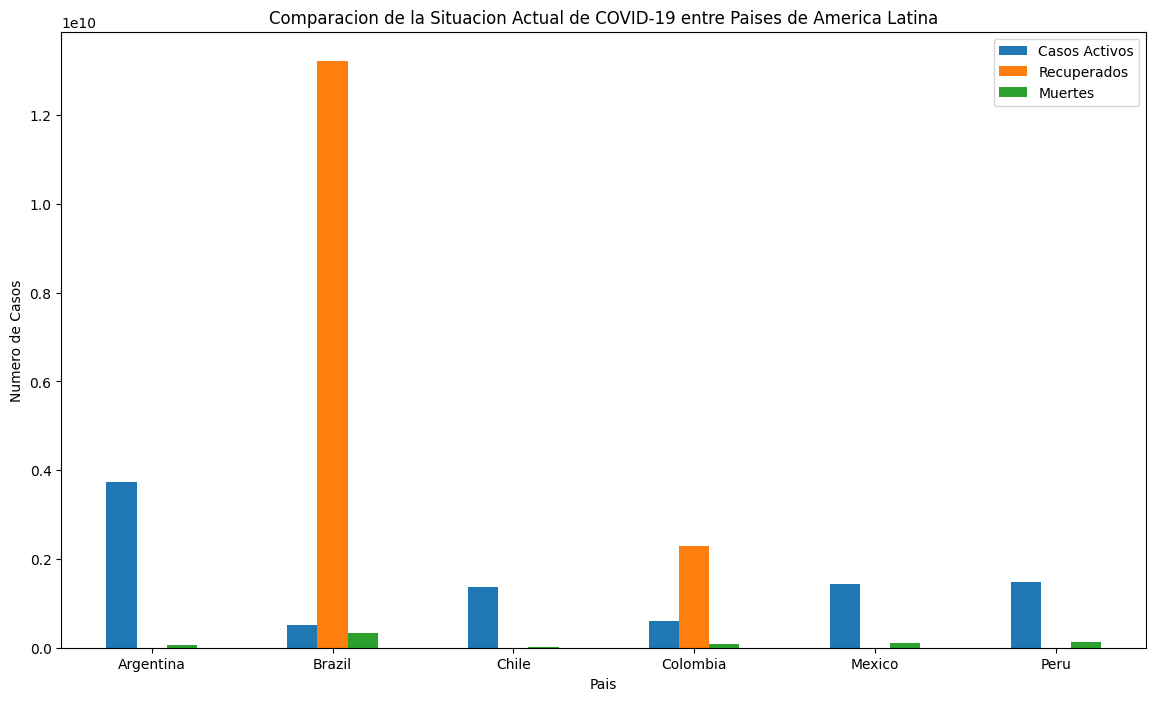

In [60]:
# Agrupamos los nombre de paises y calculamos la suma de las columnas especificadas 
current_situation = df_latam_paises.groupby('country_name').sum()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
# Especificamos el grafico de barras y que no esten apiladas
current_situation.plot(kind = 'bar', stacked = False, figsize = (14, 8))

plt.title('Comparacion de la Situacion Actual de COVID-19 entre Paises de America Latina')
plt.xlabel('Pais')
plt.ylabel('Numero de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation = 0)
plt.show()

Con esto podemos analizar que los paises en donde se deben expandir la empresa farmaceutica son en Brasil, Colombia y Mexico. Ya que son los paises con mas casos confirmados y muertes han tenido.  
Ademas de ser los paises con menos vacunas administradas, puede que la planificacion que han tenido no ha sido el optimo en la pandemia 